# Muhammad Abdullah Nurhidayah
# 202131050

### import Libray

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Datasets

In [2]:
data1 = pd.read_csv('salary_dataset.csv')
data1

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
data1 = data1.drop('no', axis=1)
data1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


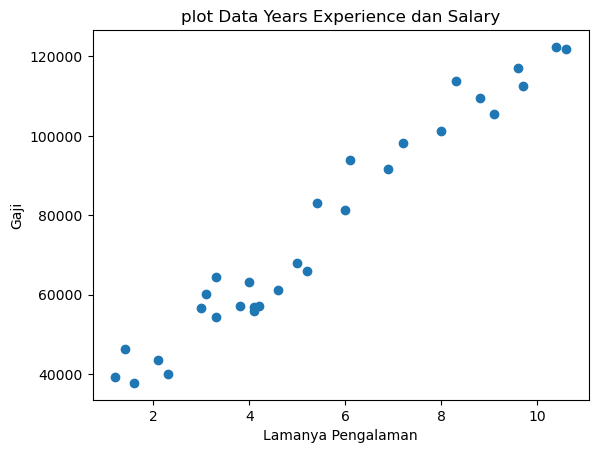

In [4]:
plt.scatter(data1.YearsExperience, data1.Salary)
plt.xlabel('Lamanya Pengalaman')
plt.ylabel('Gaji')
plt.title('plot Data Years Experience dan Salary')
plt.show()

In [5]:
data2 = pd.read_csv('ini_dataset/data-penjualan.csv', ';')
data2.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_3400\4074536869.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data2 = pd.read_csv('ini_dataset/data-penjualan.csv', ';')


,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   promosi    15 non-null     int64
 1   penjualan  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


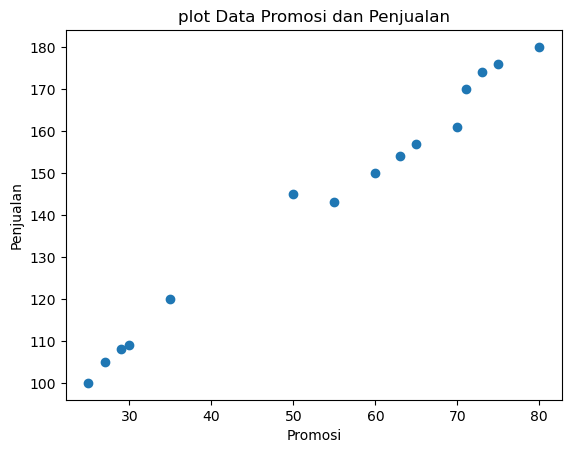

In [7]:
plt.scatter(data2.promosi, data2.penjualan)
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title('plot Data Promosi dan Penjualan')
plt.show()

### Korelasi

In [8]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
data2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


### Split Kolom

In [10]:
import numpy as np

In [11]:
#data salary
x = data1['YearsExperience'].values[:, np.newaxis] #sebagai x_train1
y= data1['Salary'].values #sebagai y_train1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

#data penjualan
promosi = data2['promosi'].values[:, np.newaxis] #sebagai x_train2
penjualan = data2['penjualan'].values #sebagai y_train2

#tidak pakai split train_test karena datanya sedikit
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

### Modelling

In [12]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(x_train, y_train)
model2.fit(promosi, penjualan)

LinearRegression()

### Testing

In [13]:
x_test

array([[ 1.6],
       [10.4],
       [ 4.2],
       [ 4. ],
       [ 9.6],
       [ 8.8],
       [ 9.7],
       [ 4.1],
       [ 5.4]])

In [14]:
#khusus ssplit data
pred_salary = model1.predict(x_test)
print("Prediksi Gaji: ", pred_salary)

Prediksi Gaji:  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735
 115700.87356004 108212.66453108 116636.89968866  64219.43648597
  76387.77615802]


In [15]:
#dataset 1
x_test_baru = [[1.1],[11],[7]]
pred_salary = model1.predict(x_test)

#dataset 2
promosi_test = [[20],[100]]
pred_penjualan = model2.predict(promosi_test)

print("Prediksi Gaji: ", pred_salary)
print("Prediksi Penjualan: ", pred_penjualan)

Prediksi Gaji:  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735
 115700.87356004 108212.66453108 116636.89968866  64219.43648597
  76387.77615802]
Prediksi Penjualan:  [ 95.38781949 208.95989944]


### Visualisasi

In [25]:
import matplotlib.pyplot as plt

prediksi_penjualan = model2.predict(promosi)
dataframe_baru = pd.dataframe_({'promosi' : data2.promosi, 'penjualan': prediksi_penjualan})
plt.scatter(data2.promosi, data2.penjualan)
plt.plot(dataframe_baru.promosi, dataframe_baru.penjualan, color='red')
plt.xlabel('Promosi')
plt.ylabel('penjualan')
plt.title('Plot Regresi Data dan Penjualan')
plt.show()

AttributeError: module 'pandas' has no attribute 'Dataframe'

### Cek Akurasi

In [17]:
from sklearn.metrics import r2_score
akurasi = r2_score(data2, dataframe_baru)
print(akurasi*100){
 "cells": [
  {
   "cell_type": "markdown",
   "id": "01ee4137",
   "metadata": {},
   "source": [
    "# Muhammad Abdullah Nurhidayah\n",
    "# 202131050"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "449399d5",
   "metadata": {},
   "source": [
    "### import Libray"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "92e09069",
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "7d9b658a",
   "metadata": {},
   "source": [
    "### Datasets"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "e899eba9",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>no</th>\n",
       "      <th>YearsExperience</th>\n",
       "      <th>Salary</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0</td>\n",
       "      <td>1.2</td>\n",
       "      <td>39344.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1</td>\n",
       "      <td>1.4</td>\n",
       "      <td>46206.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>2</td>\n",
       "      <td>1.6</td>\n",
       "      <td>37732.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>3</td>\n",
       "      <td>2.1</td>\n",
       "      <td>43526.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>2.3</td>\n",
       "      <td>39892.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>5</td>\n",
       "      <td>3.0</td>\n",
       "      <td>56643.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>6</td>\n",
       "      <td>3.1</td>\n",
       "      <td>60151.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>7</td>\n",
       "      <td>3.3</td>\n",
       "      <td>54446.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>8</td>\n",
       "      <td>3.3</td>\n",
       "      <td>64446.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>9</td>\n",
       "      <td>3.8</td>\n",
       "      <td>57190.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>10</td>\n",
       "      <td>4.0</td>\n",
       "      <td>63219.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>11</td>\n",
       "      <td>4.1</td>\n",
       "      <td>55795.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>12</td>\n",
       "      <td>4.1</td>\n",
       "      <td>56958.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>13</td>\n",
       "      <td>4.2</td>\n",
       "      <td>57082.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>14</td>\n",
       "      <td>4.6</td>\n",
       "      <td>61112.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>15</td>\n",
       "      <td>5.0</td>\n",
       "      <td>67939.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>16</td>\n",
       "      <td>5.2</td>\n",
       "      <td>66030.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>17</td>\n",
       "      <td>5.4</td>\n",
       "      <td>83089.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>18</td>\n",
       "      <td>6.0</td>\n",
       "      <td>81364.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>19</td>\n",
       "      <td>6.1</td>\n",
       "      <td>93941.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>20</td>\n",
       "      <td>6.9</td>\n",
       "      <td>91739.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>21</td>\n",
       "      <td>7.2</td>\n",
       "      <td>98274.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>22</th>\n",
       "      <td>22</td>\n",
       "      <td>8.0</td>\n",
       "      <td>101303.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23</th>\n",
       "      <td>23</td>\n",
       "      <td>8.3</td>\n",
       "      <td>113813.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>24</td>\n",
       "      <td>8.8</td>\n",
       "      <td>109432.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25</th>\n",
       "      <td>25</td>\n",
       "      <td>9.1</td>\n",
       "      <td>105583.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26</th>\n",
       "      <td>26</td>\n",
       "      <td>9.6</td>\n",
       "      <td>116970.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>27</th>\n",
       "      <td>27</td>\n",
       "      <td>9.7</td>\n",
       "      <td>112636.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>28</th>\n",
       "      <td>28</td>\n",
       "      <td>10.4</td>\n",
       "      <td>122392.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>29</td>\n",
       "      <td>10.6</td>\n",
       "      <td>121873.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "    no  YearsExperience    Salary\n",
       "0    0              1.2   39344.0\n",
       "1    1              1.4   46206.0\n",
       "2    2              1.6   37732.0\n",
       "3    3              2.1   43526.0\n",
       "4    4              2.3   39892.0\n",
       "5    5              3.0   56643.0\n",
       "6    6              3.1   60151.0\n",
       "7    7              3.3   54446.0\n",
       "8    8              3.3   64446.0\n",
       "9    9              3.8   57190.0\n",
       "10  10              4.0   63219.0\n",
       "11  11              4.1   55795.0\n",
       "12  12              4.1   56958.0\n",
       "13  13              4.2   57082.0\n",
       "14  14              4.6   61112.0\n",
       "15  15              5.0   67939.0\n",
       "16  16              5.2   66030.0\n",
       "17  17              5.4   83089.0\n",
       "18  18              6.0   81364.0\n",
       "19  19              6.1   93941.0\n",
       "20  20              6.9   91739.0\n",
       "21  21              7.2   98274.0\n",
       "22  22              8.0  101303.0\n",
       "23  23              8.3  113813.0\n",
       "24  24              8.8  109432.0\n",
       "25  25              9.1  105583.0\n",
       "26  26              9.6  116970.0\n",
       "27  27              9.7  112636.0\n",
       "28  28             10.4  122392.0\n",
       "29  29             10.6  121873.0"
      ]
     },
     "execution_count": 2,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data1 = pd.read_csv('salary_dataset.csv')\n",
    "data1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "3cf8be2f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>YearsExperience</th>\n",
       "      <th>Salary</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1.2</td>\n",
       "      <td>39344.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1.4</td>\n",
       "      <td>46206.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1.6</td>\n",
       "      <td>37732.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>2.1</td>\n",
       "      <td>43526.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>2.3</td>\n",
       "      <td>39892.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   YearsExperience   Salary\n",
       "0              1.2  39344.0\n",
       "1              1.4  46206.0\n",
       "2              1.6  37732.0\n",
       "3              2.1  43526.0\n",
       "4              2.3  39892.0"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data1 = data1.drop('no', axis=1)\n",
    "data1.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "0e906bac",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAlYAAAHFCAYAAAAwv7dvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABWoElEQVR4nO3deVxU1f8/8NcAMuwjoDCMmpKaSribilpohpiC+imzXFCyzDS30jQ/lUiL5pItmlvfPlmSoX1cEkty3xKEQEwk82ORmoKY4AAm65zfH/7m5mUAAS/MwLyej8c8Hs2973vnzADOq3POPVclhBAgIiIiontmY+4GEBERETUUDFZERERECmGwIiIiIlIIgxURERGRQhisiIiIiBTCYEVERESkEAYrIiIiIoUwWBEREREphMGKiIiISCEMVmT1+vfvj/79+9fo2EWLFmHHjh1VrlepVNLD1tYW7u7u6Ny5MyZPnoz4+PgataGmbbmb9PR0uLq64sknnyx3/6ZNm6BSqbBu3TrFXrO2LFy4UPbZl3388ccf5m5ipTZs2FAv2llT5nx/xcXFWLduHR566CF4eHjAyckJLVu2xPDhw7F9+/YanbNVq1YIDw9XtqFUbzBYEd2DmoSZkSNHIi4uDseOHUN0dDTGjx+P+Ph4BAQEYObMmXXalsr4+vpixYoV2LZtGzZt2iTbl5mZienTpyM4OBiTJ09W7DVrW2xsLOLi4kwePj4+5m5apYYOHVov2lkfhYWFYfr06RgwYACioqIQExODN954A3Z2dvjhhx/M3Tyqh+zM3QAia+Pt7Y3evXtLz4ODgzFr1iy88MIL+Pjjj9G+fXtMmTLFjC38x6RJk7B9+3bpi8f4xT558mQIIfDZZ5/VSTv+/vtvODk53fN5unfvjiZNmijQorpx69YtODg4oGnTpmjatKm5m9PgpKenY/PmzViwYAEiIyOl7QMHDsSkSZNgMBjM2LrbhBAoKCiAo6OjuZtCVcQeK2qQjEM/J0+exBNPPAE3NzdoNBqMGzcO165du+vx2dnZmDp1Kpo1awZ7e3vcf//9eP3111FYWCjVqFQq3Lx5E1988YU0pFTTIUVbW1usWrUKTZo0wbJly6TtBQUFmD17Nrp06QKNRgMPDw8EBATg22+/lR1fWVuuXbuGqVOnws/PDy4uLvDy8sKjjz6Ko0ePVqltxvD0wgsvAAA2btyInTt3YtWqVWjWrBmEEFi9ejW6dOkCR0dHuLu7Y+TIkfj9999l59m7dy+GDx+O5s2bw8HBAW3atMHkyZPx119/yeqMP7vk5GSMHDkS7u7uaN26NQDg999/xzPPPAOdTge1Wg1vb28MHDgQKSkpVf6sK/Pee+/BxsYGMTExsu3h4eFwcnLC6dOnAQCHDh2CSqVCVFQUXnnlFWi1Wjg6OiIwMBAnT540Oe9PP/2EYcOGwcPDAw4ODujatSu2bNkiqzEOh+3ZswcTJ05E06ZN4eTkhMLCwgqHyvbt24eBAwfCzc0NTk5O6Nu3L/bv3y+rMX6eZ86cwejRo6HRaODt7Y2JEydCr9fLag0GA1auXCn9LBs3bozevXtj586dsrrNmzcjICAAzs7OcHFxQXBwcLnvuzzx8fHo27cvHBwcoNPpMH/+fBQXF5vUbd68GYMGDYKPjw8cHR3RoUMHvPbaa7h586asLjw8HC4uLjh//jyGDBkCFxcXtGjRArNnz5b9vZbn+vXrAFBhT6CNzT9fkVX9WyxPdY5VqVSYNm0a1q5diw4dOkCtVmPDhg1o27YtgoODTerz8/Oh0Wjw0ksv3bUdVEcEUQMUEREhAIiWLVuKV199Vfzwww9ixYoVwtnZWXTt2lUUFRVJtYGBgSIwMFB6fuvWLdGpUyfh7Owsli9fLvbs2SPefPNNYWdnJ4YMGSLVxcXFCUdHRzFkyBARFxcn4uLixJkzZyptFwDx0ksvVbj/mWeeEQDEpUuXhBBC3LhxQ4SHh4uNGzeKAwcOiNjYWDFnzhxhY2Mjvvjiiyq15ezZs2LKlCkiOjpaHDp0SOzatUs899xzwsbGRhw8eLBKn+fXX38tAIhFixYJd3d38eSTT0r7Jk2aJBo1aiRmz54tYmNjxaZNm0T79u2Ft7e3yMzMlOrWrFkjFi9eLHbu3CkOHz4svvjiC9G5c2fRrl072c/jzp/dvHnzxN69e8WOHTuEEEK0a9dOtGnTRmzcuFEcPnxYbN26VcyePfuu78N4zszMTFFcXCx7lJSUSHUGg0EMGTJEuLu7iz/++EMIIcR//vMfAUD83//9n1R38OBBAUC0aNFCDB8+XMTExIioqCjRpk0b4ebmJn777Tep9sCBA8Le3l48/PDDYvPmzSI2NlaEh4cLAOLzzz+X6j7//HMBQDRr1ky88MILYvfu3eK///2vKCkpkfalp6dL9Rs3bhQqlUqMGDFCbNu2TcTExIiQkBBha2sr9u3bZ/Le27VrJxYsWCD27t0rVqxYIdRqtXj22Wdln1NYWJhQqVTi+eefF99++63YvXu3ePfdd8VHH30k1bz77rtCpVKJiRMnil27dolt27aJgIAA4ezsfNff/zNnzggnJyfh5+cnvv76a/Htt9+K4OBgcd9995m8v7ffflt88MEH4rvvvhOHDh0Sa9euFb6+vmLAgAGyc06YMEHY29uLDh06iOXLl4t9+/aJBQsWCJVKJSIjIyttT35+vmjcuLHQarVi3bp1stcvq6p/i0II0bJlSzFhwoQaHWv8HejUqZPYtGmTOHDggEhNTRUfffSRUKlU4ty5c7L6Tz75RAC462dPdYfBihok45fJyy+/LNv+1VdfCQAiKipK2lY2WK1du1YAEFu2bJEdu2TJEgFA7NmzR9rm7Ows+wf0bu4WrObNmycAiBMnTpS7v6SkRBQXF4vnnntOdO3aVbavqm0xnmPgwIHiX//6V5XbPmrUKAFAeHt7i2vXrgkhbgc6AOL999+X1V66dEk4OjqKuXPnlnsug8EgiouLxYULFwQA8e2330r7jD+7BQsWyI7566+/BADx4YcfVrnNZc9Z3qN169Ymr9O8eXPRs2dPkZycLJycnMS4ceNkNcZg1a1bN2EwGKTtf/zxh2jUqJF4/vnnpW3t27cXXbt2FcXFxbJzhISECB8fH1FaWiqE+CdYjR8/3qT9ZYPVzZs3hYeHhwgNDZXVlZaWis6dO4uePXuavPelS5fKaqdOnSocHByk9h85ckQAEK+//nqFn+PFixeFnZ2dmD59umx7Xl6e0Gq1YtSoURUeK4QQTz/9tHB0dJQF7pKSEtG+fXuTYHUn4+/L4cOHBQBx6tQpad+ECRPK/XsdMmSIaNeuXaXtEUKI7777TjRp0kT6ffD09BRPPfWU2LlzZ6XHVfa3WDZYVedYAEKj0Yjs7GzZ9tzcXOHq6ipmzpwp2+7n52cSNsm8OBRIDdrYsWNlz0eNGgU7OzscPHiwwmMOHDgAZ2dnjBw5UrbdeJVP2aEWJQkhTLZ988036Nu3L1xcXGBnZ4dGjRrhs88+wy+//FLl865duxbdunWDg4ODdI79+/dX6xxvvfUWAGDGjBnSPKVdu3ZBpVJh3LhxKCkpkR5arRadO3fGoUOHpOOzsrLw4osvokWLFlIbWrZsCQDltqPs1YgeHh5o3bo1li1bhhUrVuDkyZPVngOzb98+JCYmyh5lJ/x7enpi8+bNSE5ORp8+fXDfffdh7dq15Z5vzJgxUKlU0vOWLVuiT58+0u/X+fPncfbsWen38M7PaMiQIcjIyMCvv/5a6fsuz/Hjx5GdnY0JEybIzmkwGDB48GAkJiaaDJkNGzZM9rxTp04oKChAVlYWAGD37t0AUOmQ0g8//ICSkhKMHz9e9roODg4IDAyU/bzLc/DgQQwcOBDe3t7SNltbWzz99NMmtb///jvGjBkDrVYLW1tbNGrUCIGBgQBMf19UKhVCQ0NN3t+FCxcqbQ8ADBkyBBcvXsT27dsxZ84cPPjgg9ixYweGDRuGadOmyWrv5W+xOsc++uijcHd3l21zdXXFs88+iw0bNkg/2wMHDiAtLc2knWReDFbUoGm1WtlzOzs7eHp6SnMrynP9+nVotVrZFyYAeHl5wc7OrtJj75Xxi0Cn0wEAtm3bhlGjRqFZs2aIiopCXFwcEhMTMXHiRBQUFFTpnCtWrMCUKVPQq1cvbN26FfHx8UhMTMTgwYNx69atKrdNrVYDAOzt7aVtV69ehRAC3t7eaNSokewRHx8vzZ8yGAwYNGgQtm3bhrlz52L//v1ISEiQlpgorx1l572oVCrs378fwcHBWLp0Kbp164amTZtixowZyMvLq9J76Ny5M3r06CF7+Pv7m9T16tULDz74IAoKCjBlyhQ4OzuXe76yv1/GbcbfkatXrwIA5syZY/L5TJ06FQBM5phV5co/43lHjhxpct4lS5ZACIHs7GzZMZ6enrLnxp+n8bO/du0abG1ty31PZV/3oYceMnndzZs3m7yXsox/W2WV3Zafn4+HH34YJ06cwDvvvINDhw4hMTER27Ztk7XZyMnJCQ4ODibvr6p/I46OjhgxYgSWLVuGw4cP4/z58/Dz88Mnn3yCM2fOALi3v8XqHlvR78D06dORl5eHr776CgCwatUqNG/eHMOHD6/S+6S6wasCqUHLzMxEs2bNpOclJSW4fv26yZfMnTw9PXHixAkIIWThKisrCyUlJbV2VdmtW7ewb98+tG7dGs2bNwcAREVFwdfXF5s3b5a15W6Tcu8UFRWF/v37Y82aNbLtVQ0jlWnSpAlUKhWOHj0qfVHfybgtNTUVp06dwoYNGzBhwgRp//nz5ys8d9lgC9zuETJOpj937hy2bNmChQsXoqioqMJepZqIiIjA6dOn0b17dyxYsAAhISG4//77TeoyMzPL3Wb8/TL+rsyfPx9PPPFEua/Vrl072fPy3ndZxvOuXLlSdoXpne7sFaqKpk2borS0FJmZmRV+sRtf97///a/U21gdnp6eFX5mdzpw4ACuXLmCQ4cOSb1UAHDjxo1qv2ZN3HfffXjhhRcwa9YsnDlzBg8++OA9/S1W99iKfgfatGmDxx9/HJ988gkef/xx7Ny5E5GRkbC1ta3mO6TaxB4ratCM/2dntGXLFpSUlFR69d7AgQORn59vMkT05ZdfSvuN1Gp1tXp9KlJaWopp06bh+vXrmDdvnrRdpVLB3t5e9g9tZmZmuVcTVdQWlUplEnp+/vlnxMXF3XO7Q0JCIITA5cuXTXqCevTogY4dO0ptMLbxTveyuOgDDzyAN954Ax07dkRycnLN30QZe/fuxeLFi/HGG29g79690Gg0ePrpp1FUVGRS+/XXX8uGby9cuIDjx49Lv1/t2rVD27ZtcerUqXI/nx49esDV1bXabezbty8aN26MtLS0Cs97Z89iVTz++OMAYBLA7xQcHAw7Ozv89ttvFb5uZQYMGID9+/dLPV/A7d/9zZs3y+pq4/elPHl5ecjPzy93n3GIzth7XJ2/xbLu5diyZs6ciZ9//hkTJkyAra0tJk2aVO1zUO1ijxU1aNu2bYOdnR2CgoJw5swZvPnmm+jcuTNGjRpV4THjx4/HJ598ggkTJuCPP/5Ax44dcezYMSxatAhDhgzBY489JtV27NgRhw4dQkxMDHx8fODq6mrSA1HW1atXER8fDyEE8vLykJqaii+//BKnTp3Cyy+/LPuHMiQkBNu2bcPUqVMxcuRIXLp0CW+//TZ8fHzwv//9T3beitoSEhKCt99+GxEREQgMDMSvv/6Kt956C76+vigpKanhJ3tb37598cILL+DZZ5/FTz/9hEceeQTOzs7IyMjAsWPH0LFjR0yZMgXt27dH69at8dprr0EIAQ8PD8TExGDv3r1Vfq2ff/4Z06ZNw1NPPYW2bdvC3t4eBw4cwM8//4zXXnutSudISkqCRqMx2e7n5wc3NzdkZGRg3LhxCAwMREREBGxsbLB582Y88sgjmDt3Lj788EPZcVlZWfjXv/6FSZMmQa/XIyIiAg4ODpg/f75Us27dOjz++OMIDg5GeHg4mjVrhuzsbPzyyy9ITk7GN998U+XPwMjFxQUrV67EhAkTkJ2djZEjR8LLywvXrl3DqVOncO3atUoDUnkefvhhhIWF4Z133sHVq1cREhICtVqNkydPwsnJCdOnT0erVq3w1ltv4fXXX8fvv/+OwYMHw93dHVevXkVCQgKcnZ1l60GV9cYbb2Dnzp149NFHsWDBAjg5OeGTTz4xmQ/Wp08fuLu748UXX0RERAQaNWqEr776CqdOnar2Z1WZX3/9FcHBwXjmmWcQGBgIHx8f5OTk4LvvvsP69evRv39/9OnTB0D1/hbLupdjywoKCoKfnx8OHjyIcePGwcvLq8bvn2qJ+ebNE9Ue45VQSUlJIjQ0VLi4uAhXV1cxevRocfXqVVlt2asChRDi+vXr4sUXXxQ+Pj7Czs5OtGzZUsyfP18UFBTI6lJSUkTfvn2Fk5OTAGBynrJwx9VoNjY2ws3NTXTs2FG88MILIi4urtxj3nvvPdGqVSuhVqtFhw4dxKeffiq9v6q0pbCwUMyZM0c0a9ZMODg4iG7duokdO3aICRMmiJYtW971szRKT08XAMSyZctM9v3nP/8RvXr1Es7OzsLR0VG0bt1ajB8/Xvz0009STVpamggKChKurq7C3d1dPPXUU+LixYsCgIiIiJDqjO/NeOWh0dWrV0V4eLho3769cHZ2Fi4uLqJTp07igw8+kC2ZUJ7KrgoEIPbu3StKSkpEYGCg8Pb2FhkZGbLjly1bJgCI7du3CyH+uSpw48aNYsaMGaJp06ZCrVaLhx9+WPaejU6dOiVGjRolvLy8RKNGjYRWqxWPPvqoWLt2rVRjvPIvMTHR5PjyllsQQojDhw+LoUOHCg8PD9GoUSPRrFkzMXToUPHNN9/c9fMs75ylpaXigw8+EP7+/sLe3l5oNBoREBAgYmJiZMfu2LFDDBgwQLi5uQm1Wi1atmwpRo4cKVvmoSI//vij6N27t1Cr1UKr1YpXX31VrF+/3qQtx48fFwEBAcLJyUk0bdpUPP/88yI5OdlkmYoJEyYIZ2dnk9cp72+krJycHPHOO++IRx99VDRr1kzY29sLZ2dn0aVLF/HOO++Iv//+W1Zf1b/F8q4KrOqxuMuVw0IIsXDhQgFAxMfHV1pH5qESopzLkIjquYULFyIyMhLXrl2rVyttU/1w6NAhDBgwAN98843J1aNEta1Hjx5QqVRITEw0d1OoHBwKJCIisnC5ublITU3Frl27kJSUVOMbRFPtY7AiIiKycMnJyRgwYAA8PT0RERGBESNGmLtJVAEOBRIREREphMstEBERESmEwYqIiIhIIQxWRERERArh5PU6ZjAYcOXKFbi6ulbp1hVERERkfuL/L+qs0+lgY1NxvxSDVR27cuUKWrRoYe5mEBERUQ1cunRJup9reRis6pjxvmCXLl2Cm5ubmVtDREREVZGbm4sWLVrc9f6eDFZ1zDj85+bmxmBFRERUz9xtGg8nrxMREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCGKyIiIiIFMJgRURERKQQBisiIiIihTBYERERESmEK68TERGRxSo1CCSkZyMrrwBerg7o6esBW5vKVz83JwYrIiIiskixqRmIjElDhr5A2uajcUBEqB8G+/uYsWUV41AgERERWZzY1AxMiUqWhSoAyNQXYEpUMmJTM2TbSw0Ccb9dx7cplxH323WUGkRdNlfCHisiIiKyKKUGgciYNJQXjQQAFYDImDQE+Wlha6OyqJ4t9lgRERGRRUlIzzbpqbqTAJChL0BCena1e7ZqG4MVERERWZSsvIpD1Z0y9bcq7dkCbvds1eWwIIMVERERWRQvV4cq1WXfLKpyz1ZdYbAiIiIii9LT1wM+GgdUtKiCCrfnUHm4qKt0vqr2gCmBwYqIiIgsiq2NChGhfgBgEq6MzyNC/aB1q1rPVlV7wJTAYEVEREQWZ7C/D9aM6watRh6KtBoHrBnXDYP9farcs9XT16PW22tk1mB15MgRhIaGQqfTQaVSYceOHdK+4uJizJs3Dx07doSzszN0Oh3Gjx+PK1euyM5RWFiI6dOno0mTJnB2dsawYcPw559/ympycnIQFhYGjUYDjUaDsLAw3LhxQ1Zz8eJFhIaGwtnZGU2aNMGMGTNQVFQkqzl9+jQCAwPh6OiIZs2a4a233oIQ5lkng4iIqKEb7O+DY/MexdeTeuOjZ7rg60m9cWzeo9ISClXt2arLldrNGqxu3ryJzp07Y9WqVSb7/v77byQnJ+PNN99EcnIytm3bhnPnzmHYsGGyulmzZmH79u2Ijo7GsWPHkJ+fj5CQEJSWlko1Y8aMQUpKCmJjYxEbG4uUlBSEhYVJ+0tLSzF06FDcvHkTx44dQ3R0NLZu3YrZs2dLNbm5uQgKCoJOp0NiYiJWrlyJ5cuXY8WKFbXwyRARERFwOzwFtPbE8C7NENDa0yQkVaVnq04JCwFAbN++vdKahIQEAUBcuHBBCCHEjRs3RKNGjUR0dLRUc/nyZWFjYyNiY2OFEEKkpaUJACI+Pl6qiYuLEwDE2bNnhRBCfP/998LGxkZcvnxZqvn666+FWq0Wer1eCCHE6tWrhUajEQUFBVLN4sWLhU6nEwaDocrvU6/XCwDSeYmIiOjelZQaxPHzf4kdJ/8Ux8//JUpKq/7dXBVV/f6uV3Os9Ho9VCoVGjduDABISkpCcXExBg0aJNXodDr4+/vj+PHjAIC4uDhoNBr06tVLqunduzc0Go2sxt/fHzqdTqoJDg5GYWEhkpKSpJrAwECo1WpZzZUrV/DHH39U2ObCwkLk5ubKHkRERKSsu/Vs1ZV6E6wKCgrw2muvYcyYMXBzcwMAZGZmwt7eHu7u7rJab29vZGZmSjVeXl4m5/Py8pLVeHt7y/a7u7vD3t6+0hrjc2NNeRYvXizN7dJoNGjRokV13jYRERHVI/UiWBUXF+OZZ56BwWDA6tWr71ovhIBK9U9SvfO/lawR/3/iennHGs2fPx96vV56XLp06a7tJyIiovrJ4oNVcXExRo0ahfT0dOzdu1fqrQIArVaLoqIi5OTkyI7JysqSepO0Wi2uXr1qct5r167Jasr2OuXk5KC4uLjSmqysLAAw6cm6k1qthpubm+xBREREDZNFBytjqPrf//6Hffv2wdPTU7a/e/fuaNSoEfbu3Stty8jIQGpqKvr06QMACAgIgF6vR0JCglRz4sQJ6PV6WU1qaioyMv65UeOePXugVqvRvXt3qebIkSOyJRj27NkDnU6HVq1aKf7eiYiIqP5RCWG+hZjy8/Nx/vx5AEDXrl2xYsUKDBgwAB4eHtDpdHjyySeRnJyMXbt2yXqFPDw8YG9vDwCYMmUKdu3ahQ0bNsDDwwNz5szB9evXkZSUBFtbWwDA448/jitXrmDdunUAgBdeeAEtW7ZETEwMgNvLLXTp0gXe3t5YtmwZsrOzER4ejhEjRmDlypUAbk+cb9euHR599FH8+9//xv/+9z+Eh4djwYIFsmUZ7iY3NxcajQZ6vZ69V0RERPVElb+/Fb0WsZoOHjwocPseibLHhAkTRHp6ern7AIiDBw9K57h165aYNm2a8PDwEI6OjiIkJERcvHhR9jrXr18XY8eOFa6ursLV1VWMHTtW5OTkyGouXLgghg4dKhwdHYWHh4eYNm2abGkFIYT4+eefxcMPPyzUarXQarVi4cKF1VpqQQgut0BERFQfVfX726w9VtaIPVZERET1T1W/v+3qsE1ERERkoUoNAgnp2cjKK4CX6+3765lrLaj6jMGKiIjIysWmZiAyJg0Z+gJpm4/GARGhfnV/S5h6zqKvCiQiIqLaFZuagSlRybJQBQCZ+gJMiUpGbGpGBUdSeRisiIiIrFSpQSAyJg3lTbY2bouMSUOpgdOxq4rBioiIyEolpGeb9FTdSQDI0BcgIT277hpVzzFYERERWamsvIpDVU3qiMGKiIjIanm5OihaRwxWREREVqunrwd8NA6oaFEFFW5fHdjT16Mum1WvMVgRERFZKVsbFSJC/QDAJFwZn0eE+nE9q2pgsCIiIrJig/19sGZcN2g18uE+rcYBa8Z14zpW1cQFQomIiKzcYH8fBPlpufK6AhisiIiICLY2KgS09jR3M+o9DgUSERERKYQ9VkRERHfgzYjpXjBYERER/X+8GTHdKw4FEhERgTcjJmUwWBERkdXjzYhJKQxWRERk9XgzYlIK51gREZHV482Iy8eJ/NXHYEVERFaPNyM2xYn8NcOhQCIisnq8GbEcJ/LXHIMVERFZPd6M+B+cyH9vGKyIiIjAmxEbcSL/veEcKyIiov+PNyPmRP57xWBFRER0B2u/GTEn8t8bDgUSERGRhBP57w2DFREREUk4kf/eMFgRERGRDCfy1xznWBEREZEJTuSvGQYrIiIiKpe1T+SvCQYrIiKiOsT77zVsDFZERER1hPffa/g4eZ2IiKgO8P571oHBioiIqJbx/nvWg8GKiIiolvH+e9aDwYqIiKiW8f571oPBioiIqJbx/nvWg8GKiIiolvH+e9aDwYqIiKiW8f571oPBioiIqA7w/nvWgQuEEhER1RHef6/hY7AiIiKqQ7z/XsPGoUAiIiIihTBYERERESmEwYqIiIhIIQxWRERERArh5HUiIqJ6oNQgeDVhPcBgRUREZOFiUzMQGZMmu5Gzj8YBEaF+XP/KwnAokIiIyILFpmZgSlSyLFQBQKa+AFOikhGbmmGmllF5GKyIiIgsVKlBIDImDaKcfcZtkTFpKDWUV0HmwGBFRERkoRLSs016qu4kAGToC5CQnl13jaJKMVgRERFZqKy8ikNVTeqo9jFYERERWSgvV4e7F1WjjmofgxUREZGF6unrAR+NAypaVEGF21cH9vT1qMtmUSUYrIiIiCyUrY0KEaF+AGASrozPI0L9uJ6VBWGwIiIismCD/X2wZlw3aDXy4T6txgFrxnXjOlYWhguEEhERWbjB/j4I8tNy5fV6gMGKiIioHrC1USGgtae5m0F3waFAIiIiIoUwWBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgivCiQiogan1CC4NAGZBYMVERE1KLGpGYiMSUOG/p8bE/toHBAR6sfFNKnWcSiQiIgajNjUDEyJSpaFKgDI1BdgSlQyYlMzzNQyshYMVkRE1CCUGgQiY9Igytln3BYZk4ZSQ3kVRMpgsCIiogYhIT3bpKfqTgJAhr4ACenZddcosjoMVkRE1CBk5VUcqmpSR1QTZg1WR44cQWhoKHQ6HVQqFXbs2CHbL4TAwoULodPp4OjoiP79++PMmTOymsLCQkyfPh1NmjSBs7Mzhg0bhj///FNWk5OTg7CwMGg0Gmg0GoSFheHGjRuymosXLyI0NBTOzs5o0qQJZsyYgaKiIlnN6dOnERgYCEdHRzRr1gxvvfUWhGCXMhGRJfBydVC0jqgmzBqsbt68ic6dO2PVqlXl7l+6dClWrFiBVatWITExEVqtFkFBQcjLy5NqZs2ahe3btyM6OhrHjh1Dfn4+QkJCUFpaKtWMGTMGKSkpiI2NRWxsLFJSUhAWFibtLy0txdChQ3Hz5k0cO3YM0dHR2Lp1K2bPni3V5ObmIigoCDqdDomJiVi5ciWWL1+OFStW1MInQ0RE1dXT1wM+GgdUtKiCCrevDuzp61GXzSJrIywEALF9+3bpucFgEFqtVrz33nvStoKCAqHRaMTatWuFEELcuHFDNGrUSERHR0s1ly9fFjY2NiI2NlYIIURaWpoAIOLj46WauLg4AUCcPXtWCCHE999/L2xsbMTly5elmq+//lqo1Wqh1+uFEEKsXr1aaDQaUVBQINUsXrxY6HQ6YTAYqvw+9Xq9ACCdl4iIlLP79BXRat4u0WreLtHyjodx2+7TV8zdRKqnqvr9bbFzrNLT05GZmYlBgwZJ29RqNQIDA3H8+HEAQFJSEoqLi2U1Op0O/v7+Uk1cXBw0Gg169eol1fTu3RsajUZW4+/vD51OJ9UEBwejsLAQSUlJUk1gYCDUarWs5sqVK/jjjz8qfB+FhYXIzc2VPYiIqHYM9vfBmnHdoNXIh/u0GgesGdeN61hRrbPYBUIzMzMBAN7e3rLt3t7euHDhglRjb28Pd3d3kxrj8ZmZmfDy8jI5v5eXl6ym7Ou4u7vD3t5eVtOqVSuT1zHu8/X1Lfd9LF68GJGRkXd9v0REpIzB/j4I8tNy5XUyC4sNVkYqlfwPQQhhsq2ssjXl1StRI/7/xPXK2jN//ny88sor0vPc3Fy0aNGi0vYTEdG9sbVRIaC1p7mbQVbIYocCtVotgH96royysrKkniKtVouioiLk5ORUWnP16lWT81+7dk1WU/Z1cnJyUFxcXGlNVlYWANNetTup1Wq4ubnJHkREDUWpQSDut+v4NuUy4n67zsU3yepZbLDy9fWFVqvF3r17pW1FRUU4fPgw+vTpAwDo3r07GjVqJKvJyMhAamqqVBMQEAC9Xo+EhASp5sSJE9Dr9bKa1NRUZGT8c6uDPXv2QK1Wo3v37lLNkSNHZEsw7NmzBzqdzmSIkIjIGsSmZqDfkgMY/Wk8ZkanYPSn8ei35ABvG0NWzazBKj8/HykpKUhJSQFwe8J6SkoKLl68CJVKhVmzZmHRokXYvn07UlNTER4eDicnJ4wZMwYAoNFo8Nxzz2H27NnYv38/Tp48iXHjxqFjx4547LHHAAAdOnTA4MGDMWnSJMTHxyM+Ph6TJk1CSEgI2rVrBwAYNGgQ/Pz8EBYWhpMnT2L//v2YM2cOJk2aJPUwjRkzBmq1GuHh4UhNTcX27duxaNEivPLKK3cdmiQiamh4Tz6i8qmEMN8Kl4cOHcKAAQNMtk+YMAEbNmyAEAKRkZFYt24dcnJy0KtXL3zyySfw9/eXagsKCvDqq69i06ZNuHXrFgYOHIjVq1fL5jFlZ2djxowZ2LlzJwBg2LBhWLVqFRo3bizVXLx4EVOnTsWBAwfg6OiIMWPGYPny5bKrAE+fPo2XXnoJCQkJcHd3x4svvogFCxZUK1jl5uZCo9FAr9dzWJCI6qVSg0C/JQcqvH2MCrevwjs271FOGKcGo6rf32YNVtaIwYqI6ru4365j9Kfxd637elJvTiCnBqOq398WO8eKiIgsE+/JR1QxBisiIqoW3pOPqGIMVkREVC28Jx9RxRisiIioWmxtVIgI9QMAk3BlfB4R6seJ62SVGKyIiKjaeE8+ovJZ/C1tiIjIMvGefESmGKyIiKjGeE8+IjkOBRIREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCeFUgEVEdKTUILk1A1MAxWBER1YHY1AxExqQhQ//PjYl9NA6ICPXjYppEDQiHAomIallsagamRCXLQhUAZOoLMCUqGbGpGWZqGREpjcGKiKgWlRoEImPSIMrZZ9wWGZOGUkN5FURU3zBYERHVooT0bJOeqjsJABn6AiSkZ9ddo4io1jBYERHVoqy8ikNVTeqIyLIxWBER1SIvVwdF64jIsjFYERHVop6+HvDROKCiRRVUuH11YE9fj7psFhHVEgYrIqJaZGujQkSoHwCYhCvj84hQP65nRdRAMFgREdWywf4+WDOuG7Qa+XCfVuOANeO6mX0dq1KDQNxv1/FtymXE/XadVygS3QMuEEpEVAcG+/sgyE9rcSuvc+FSImWphBD8X5M6lJubC41GA71eDzc3N3M3h4ismHHh0rJfAsaoZwm9aUSWoqrf3xwKJCKyQly4lKh2MFgREVkhLlxKVDsYrIiIrBAXLiWqHQxWRERWiAuXEtUOBisiIivEhUuJageDFRGRFeLCpUS1g8GKiMhKWfrCpUT1ERcIJSKyYpa6cClRfcVgRURk5WxtVAho7WnuZhA1CBwKJCIiIlIIgxURERGRQhisiIiIiBTCYEVERESkEAYrIiIiIoUwWBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCGKyIiIiIFMJgRURERKQQBisiIiIihTBYERERESmEwYqIiIhIIQxWRERERAphsCIiIiJSCIMVERERkUIYrIiIiIgUwmBFREREpBAGKyIiIiKFMFgRERERKcTO3A0gIqoLpQaBhPRsZOUVwMvVAT19PWBrozJ3s4iogWGwIqIGLzY1A5ExacjQF0jbfDQOiAj1w2B/HzO2jIgaGg4FElGDFpuagSlRybJQBQCZ+gJMiUpGbGqGmVpGRA0RgxURNVilBoHImDSIcvYZt0XGpKHUUF4FEVH1MVgRUYOVkJ5t0lN1JwEgQ1+AhPTsumsUETVoDFZE1GBl5VUcqmpSR0R0NwxWRNRgebk6KFpHRHQ3Vb4q0MPDA+fOnUOTJk3g7u4Olariy5Szs9mtTkTm19PXAz4aB2TqC8qdZ6UCoNXcXnpBaVzegcg6VTlYffDBB3B1dQUAfPjhh7XVHiIixdjaqBAR6ocpUclQAbJwZYw4EaF+igceLu9AZL1UQgheDlOHcnNzodFooNfr4ebmZu7mEFmFugw6xuUdyv7Daoxua8Z1Y7giqoeq+v1d5R6r3Nxc6US5ubmV1jo5OcHOjmuPEpFlGOzvgyA/ba0Pzd1teQcVbi/vEOSn5bAgUQNV5fTj7u6OjIwMeHl5oXHjxpXOsVKpVGjbti1Wr16NAQMGKNJQIqJ7YWujQkBrz1p9jeos71DbbSEi86hysDpw4AA8PG5P8Dx48GCltYWFhdixYwemTJmCs2fP3lsLiYjqCS7vQERVXm4hMDBQGt4LDAys9DFo0CAsXLgQLi4u99S4kpISvPHGG/D19YWjoyPuv/9+vPXWWzAYDFKNEAILFy6ETqeDo6Mj+vfvjzNnzsjOU1hYiOnTp6NJkyZwdnbGsGHD8Oeff8pqcnJyEBYWBo1GA41Gg7CwMNy4cUNWc/HiRYSGhsLZ2RlNmjTBjBkzUFRUdE/vkYgaDi7vQET3vI7VrVu3kJubK3sAgJeXF3766ad7OveSJUuwdu1arFq1Cr/88guWLl2KZcuWYeXKlVLN0qVLsWLFCqxatQqJiYnQarUICgpCXl6eVDNr1ixs374d0dHROHbsGPLz8xESEoLS0lKpZsyYMUhJSUFsbCxiY2ORkpKCsLAwaX9paSmGDh2Kmzdv4tixY4iOjsbWrVsxe/bse3qPRNRwGJd3qGiihAq3J83XxvIORGQZanRV4M2bNzFv3jxs2bIF169fN9l/Z2C5FyEhIfD29sZnn30mbXvyySfh5OSEjRs3QggBnU6HWbNmYd68eQBu9055e3tjyZIlmDx5MvR6PZo2bYqNGzfi6aefBgBcuXIFLVq0wPfff4/g4GD88ssv8PPzQ3x8PHr16gUAiI+PR0BAAM6ePYt27dph9+7dCAkJwaVLl6DT6QAA0dHRCA8PR1ZWVpWv8ONVgUQNm/GqQKD85R14VSBR/VTV7+8a9VjNnTsXBw4cwOrVq6FWq/F///d/iIyMhE6nw5dfflnjRpfVr18/7N+/H+fOnQMAnDp1CseOHcOQIUMAAOnp6cjMzMSgQYOkY9RqNQIDA3H8+HEAQFJSEoqLi2U1Op0O/v7+Uk1cXBw0Go0UqgCgd+/e0Gg0shp/f38pVAFAcHAwCgsLkZSUVOF7KCwsLLdHj4gapsH+Plgzrhu0Gvlwn1bjwFBFZAVqtCZCTEwMvvzyS/Tv3x8TJ07Eww8/jDZt2qBly5b46quvMHbsWEUaN2/ePOj1erRv3x62trYoLS3Fu+++i9GjRwMAMjMzAQDe3t6y47y9vXHhwgWpxt7eHu7u7iY1xuMzMzPh5eVl8vpeXl6ymrKv4+7uDnt7e6mmPIsXL0ZkZGR13jYR1XN1tbwDEVmeGvVYZWdnw9fXFwDg5uYm3cKmX79+OHLkiGKN27x5M6KiorBp0yYkJyfjiy++wPLly/HFF1/I6sou/SCEqHQ5iPJqyquvSU1Z8+fPh16vlx6XLl2qtF1E1DAYl3cY3qUZAlp7MlQRWYkaBav7778ff/zxBwDAz88PW7ZsAXC7J6tx48ZKtQ2vvvoqXnvtNTzzzDPo2LEjwsLC8PLLL2Px4sUAAK1WCwAmPUZZWVlS75JWq0VRURFycnIqrbl69arJ61+7dk1WU/Z1cnJyUFxcbNKTdSe1Wg03NzfZg4iIiBqmGgWrZ599FqdOnQJwu0fGONfq5ZdfxquvvqpY4/7++2/Y2MibaGtrKy234OvrC61Wi71790r7i4qKcPjwYfTp0wcA0L17dzRq1EhWk5GRgdTUVKkmICAAer0eCQkJUs2JEyeg1+tlNampqcjIyJBq9uzZA7Vaje7duyv2nomIiKgeEwq4cOGC2Lp1q0hJSVHidJIJEyaIZs2aiV27don09HSxbds20aRJEzF37lyp5r333hMajUZs27ZNnD59WowePVr4+PiI3NxcqebFF18UzZs3F/v27RPJycni0UcfFZ07dxYlJSVSzeDBg0WnTp1EXFyciIuLEx07dhQhISHS/pKSEuHv7y8GDhwokpOTxb59+0Tz5s3FtGnTqvWe9Hq9ACD0ev09fDJERERUl6r6/V2tyeu3bt3C/v37ERISAuB2b1VhYaG0Pz4+Hu3atYODgzKL361cuRJvvvkmpk6diqysLOh0OkyePBkLFiyQaubOnYtbt25h6tSpyMnJQa9evbBnzx64urpKNR988AHs7OwwatQo3Lp1CwMHDsSGDRtga2sr1Xz11VeYMWOGdPXgsGHDsGrVKmm/ra0tvvvuO0ydOhV9+/aFo6MjxowZg+XLlyvyXomIiKj+q9Y6VuvWrcOuXbsQExMDAHB1dcWDDz4IR0dHAMDZs2cxd+5cvPzyy7XT2gaA61gRERHVP7WyjtVXX32FiRMnyrZt2rQJBw8exMGDB7Fs2TJpIjsRERGRtalWsDp37hweeOAB6bmDg4NscnnPnj2RlpamXOuIiIiI6pFqzbHS6/XSjZiB28sR3MlgMMjmXBERERFZk2r1WDVv3hypqakV7v/555/RvHnze24UERERUX1UrWA1ZMgQLFiwAAUFBSb7bt26hcjISAwdOlSxxhERERHVJ9W6KvDq1avo0qUL7O3tMW3aNDzwwANQqVQ4e/YsVq1ahZKSEpw8ebLSlcitHa8KJCIiqn+q+v1drTlW3t7eOH78OKZMmYLXXnsNxkymUqkQFBSE1atXM1QRERGR1apWsAJu30YmNjYW2dnZOH/+PACgTZs28PDwULxxRERERPVJtYOVkYeHB3r27KlkW4iIiIjqtRrdhJmIiIiITDFYERERESmEwYqIiIhIIQxWRERERAphsCIiIiJSCIMVERERkUIYrIiIiIgUwmBFREREpBAGKyIiIiKFMFgRERERKYTBioiIiEghDFZERERECmGwIiIiIlIIgxURERGRQhisiIiIiBTCYEVERESkEAYrIiIiIoUwWBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCGKyIiIiIFMJgRURERKQQBisiIiIihTBYERERESmEwYqIiIhIIXbmbgARUXlKDQIJ6dnIyiuAl6sDevp6wNZGZe5mERFVisGKiCxObGoGImPSkKEvkLb5aBwQEeqHwf4+ZmwZEVHlOBRIRBYlNjUDU6KSZaEKADL1BZgSlYzY1AwztYyI6O4YrIjIYpQaBCJj0iDK2WfcFhmThlJDeRVERObHYEVEFiMhPdukp+pOAkCGvgAJ6dl11ygiompgsCIii5GVV3GoqkkdEVFdY7AiIovh5eqgaB0RUV1jsCIii9HT1wM+GgdUtKiCCrevDuzp61GXzSIiqjIGKyKyGLY2KkSE+gGASbgyPo8I9ZOtZ1VqEIj77Tq+TbmMuN+uc2I7EZkV17EiIosy2N8Ha8Z1M1nHSlvOOlZc74qILI1KCMH/vatDubm50Gg00Ov1cHNzM3dziCzW3VZeN653VfYfMGPFmnHdGK6ISDFV/f5mjxURWSRbGxUCWnuWu+9u612pcHu9qyA/LW+DQ0R1inOsiKje4XpXRGSpGKyIqN7heldEZKk4FEhUC+42P4juDde7IiJLxWBFpDBeqVb7jOtdZeoLyp1npcLtqwi53hUR1TUOBRIpyHilWtn5P5n6AkyJSkZsaoaZWtaw1GS9KyKiusBgRaSQu12pBty+Uo0LWCrDuN6VViMf7tNqHLjUAhGZDYcCiRRSnSvVKlpGgKpnsL8Pgvy0nM9GRBaDwYpIIZZ2pZq1TKCvbL0rIqK6xmBFpBBLulKNE+iJiMyDc6yIFGK8Uq2iPiEVboeb2r5SjRPoiYjMh8GKSCGWcKUaJ9ATEZkXgxWRgsx9pRpv9UJEZF6cY0WkMHNeqWZpE+iJiKwNgxVRLTDXlWqWNIGeiMgacSiQqAGxlAn0RETWisGKqAEx9wT6UoNA3G/X8W3KZcT9dp2T5InI6nAokKiBMU6gL7uOlbaW17Hi2llERIBKCMH/paxDubm50Gg00Ov1cHNzM3dzqAGry5XXjWtnlf3HxPhqvHcfEdV3Vf3+Zo8VUQNVVxPo77Z2lgq3184K8tM2yFvqEBHdiXOsiKqBc4hMce0sIqJ/WHywunz5MsaNGwdPT084OTmhS5cuSEpKkvYLIbBw4ULodDo4Ojqif//+OHPmjOwchYWFmD59Opo0aQJnZ2cMGzYMf/75p6wmJycHYWFh0Gg00Gg0CAsLw40bN2Q1Fy9eRGhoKJydndGkSRPMmDEDRUVFtfbeybLEpmag35IDGP1pPGZGp2D0p/Hot+SA1d8ihmtnERH9w6KDVU5ODvr27YtGjRph9+7dSEtLw/vvv4/GjRtLNUuXLsWKFSuwatUqJCYmQqvVIigoCHl5eVLNrFmzsH37dkRHR+PYsWPIz89HSEgISktLpZoxY8YgJSUFsbGxiI2NRUpKCsLCwqT9paWlGDp0KG7evIljx44hOjoaW7duxezZs+vksyDz4v33Ksa1s4iI/mHRk9dfe+01/Pjjjzh69Gi5+4UQ0Ol0mDVrFubNmwfgdu+Ut7c3lixZgsmTJ0Ov16Np06bYuHEjnn76aQDAlStX0KJFC3z//fcIDg7GL7/8Aj8/P8THx6NXr14AgPj4eAQEBODs2bNo164ddu/ejZCQEFy6dAk6nQ4AEB0djfDwcGRlZVV5Ijonr9c/pQaBfksOVDjcpcLtK+6OzXvUKucQGT+fTH1BufOsrP3zIaKGoarf3xbdY7Vz50706NEDTz31FLy8vNC1a1d8+umn0v709HRkZmZi0KBB0ja1Wo3AwEAcP34cAJCUlITi4mJZjU6ng7+/v1QTFxcHjUYjhSoA6N27NzQajazG399fClUAEBwcjMLCQtnQJDU8nENUOXOvnUVEZEksOlj9/vvvWLNmDdq2bYsffvgBL774ImbMmIEvv/wSAJCZmQkA8Pb2lh3n7e0t7cvMzIS9vT3c3d0rrfHy8jJ5fS8vL1lN2ddxd3eHvb29VFOewsJC5Obmyh5Uv3AO0d2Z++bTRESWwqKXWzAYDOjRowcWLVoEAOjatSvOnDmDNWvWYPz48VKdSiX/P2EhhMm2ssrWlFdfk5qyFi9ejMjIyErbQpaNc4iqxpw3nyYishQW3WPl4+MDPz8/2bYOHTrg4sWLAACtVgsAJj1GWVlZUu+SVqtFUVERcnJyKq25evWqyetfu3ZNVlP2dXJyclBcXGzSk3Wn+fPnQ6/XS49Lly7d9X2TZeH996rOuHbW8C7NENDak6GKiKyORQervn374tdff5VtO3fuHFq2bAkA8PX1hVarxd69e6X9RUVFOHz4MPr06QMA6N69Oxo1aiSrycjIQGpqqlQTEBAAvV6PhIQEqebEiRPQ6/WymtTUVGRk/HP11549e6BWq9G9e/cK34NarYabm5vsQfUL5xAREVFVWfRVgYmJiejTpw8iIyMxatQoJCQkYNKkSVi/fj3Gjh0LAFiyZAkWL16Mzz//HG3btsWiRYtw6NAh/Prrr3B1dQUATJkyBbt27cKGDRvg4eGBOXPm4Pr160hKSoKtrS0A4PHHH8eVK1ewbt06AMALL7yAli1bIiYmBsDt5Ra6dOkCb29vLFu2DNnZ2QgPD8eIESOwcuXKKr8nXhVYf/FeeERE1qvK39/CwsXExAh/f3+hVqtF+/btxfr162X7DQaDiIiIEFqtVqjVavHII4+I06dPy2pu3bolpk2bJjw8PISjo6MICQkRFy9elNVcv35djB07Vri6ugpXV1cxduxYkZOTI6u5cOGCGDp0qHB0dBQeHh5i2rRpoqCgoFrvR6/XCwBCr9dX6ziyDCWlBnH8/F9ix8k/xfHzf4mSUoO5m0RERHWgqt/fFt1j1RCxx4qIiKj+4U2YiRqwUoNQ7Oo7Jc9FRGTtGKyI6pl7metVNkTl3CzC299x3hgRkVI4FFjHOBRYf1hiT47xnoVl/2iNrapsMc7yAll5qnIuIiJrw6FAontgiVcAlhoEImPSyr0fn8DtQBQZk4YgP61JAKwokJXnbuciIqKKWfQ6VkTmYAwhZXt2MvUFmBKVjNjUjAqOrF01vWdhZYGsuuciIqLKMVgR3eFuvULA7Z6cUkPdj6DX9J6FdwtkSrwmERHdxmBFdIea9grVhZres/BewpG13/+QiKi6GKyI7lDTXqG6UNN7FtYkHPH+h0RENcNgRXSHmvYK1YWa3rOwe0t3VGf+Oe9/SERUcwxWRHeoaa9QXRns74M147pBq5EHO63GocLlEZIu5KA6U8IqOxcREVWOyy0Q3cHYKzQlKhkqQDaJ3VJ6cgb7+yDIT1vlNbaqOmw5PqAlHvf3sYj1uoiI6isGK6IyjL1CZdex0lZjHavaXlzU1kaFgNaeVaqt6rDl4/4+VT4nERGVj8GKqBzV7RW6k6UtLmoc3szUF5S7jIQKt0MjJ6oTEd07zrEiqoCxV2h4l2YIaO1Z5VBlaYuL1nTSOxERVR+DFZFCLHlx0ZpMeiciourjUCCRQqqzuKg55jLdy/AmERFVDYMVkUIseXFRo+pMeiciourjUCCRQix5cVEiIqobDFZECrH0xUWJiKj2MVgRKYRX3xEREYMVkYJ49R0RkXXj5HUihfHqOyIi68VgRVQLePUdEZF14lAgERERkUIYrIiIiIgUwmBFREREpBAGKyIiIiKFMFgRERERKYTBioiIiEghDFZERERECmGwIiIiIlIIgxURERGRQhisiIiIiBTCYEVERESkEAYrIiIiIoUwWBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCGKyIiIiIFMJgRURERKQQBisiIiIihdiZuwFUd0oNAgnp2cjKK4CXqwN6+nrA1kZl7mYRERE1GAxWViI2NQORMWnI0BdI23w0DogI9cNgfx8ztoyIiKjh4FCgFYhNzcCUqGRZqAKATH0BpkQlIzY1w0wtIyIialgYrBq4UoNAZEwaRDn7jNsiY9JQaiivgoiIiKqDwaqBS0jPNumpupMAkKEvQEJ6dt01ioiIqIFisGrgsvIqDlU1qSMiIqKKMVg1cF6uDorWERERUcUYrBq4nr4e8NE4oKJFFVS4fXVgT1+PumwWERFRg8Rg1cDZ2qgQEeoHACbhyvg8ItSP61kREREpgMHKCgz298Gacd2g1ciH+7QaB6wZ143rWBERESmEC4RaicH+Pgjy03LldSIiolrEYGVFbG1UCGjtadY28LY6RETUkDFYUZ3hbXWIiKih4xwrqhO8rQ4REVkDBiuqdbytDhERWQsGK6p1vK0OERFZCwYrqnW8rQ4REVkLBiuqdbytDhERWQsGK6p1vK0OERFZCwYrqnW8rQ4REVkLBiuqE7ytDhERWQMuEEp1hrfVISKiho7BiuqUJdxWh4iIqLZwKJCIiIhIIQxWRERERArhUCBZpFKD4FwsIiKqd+pVj9XixYuhUqkwa9YsaZsQAgsXLoROp4OjoyP69++PM2fOyI4rLCzE9OnT0aRJEzg7O2PYsGH4888/ZTU5OTkICwuDRqOBRqNBWFgYbty4Iau5ePEiQkND4ezsjCZNmmDGjBkoKiqqrbdrtWJTM9BvyQGM/jQeM6NTMPrTePRbcoA3aiYiIotXb4JVYmIi1q9fj06dOsm2L126FCtWrMCqVauQmJgIrVaLoKAg5OXlSTWzZs3C9u3bER0djWPHjiE/Px8hISEoLS2VasaMGYOUlBTExsYiNjYWKSkpCAsLk/aXlpZi6NChuHnzJo4dO4bo6Ghs3boVs2fPrv03b0ViUzMwJSrZ5N6CmfoCTIlKZrgiIiKLphJCCHM34m7y8/PRrVs3rF69Gu+88w66dOmCDz/8EEII6HQ6zJo1C/PmzQNwu3fK29sbS5YsweTJk6HX69G0aVNs3LgRTz/9NADgypUraNGiBb7//nsEBwfjl19+gZ+fH+Lj49GrVy8AQHx8PAICAnD27Fm0a9cOu3fvRkhICC5dugSdTgcAiI6ORnh4OLKysuDm5lal95KbmwuNRgO9Xl/lY+6moQyblRoE+i05UOENm1W4ve7VsXmP1sv3R0RE9VdVv7/rRY/VSy+9hKFDh+Kxxx6TbU9PT0dmZiYGDRokbVOr1QgMDMTx48cBAElJSSguLpbV6HQ6+Pv7SzVxcXHQaDRSqAKA3r17Q6PRyGr8/f2lUAUAwcHBKCwsRFJSUoVtLywsRG5uruyhpIY0bJaQnl1hqAIAASBDX4CE9Oy6axQREVE1WHywio6ORnJyMhYvXmyyLzMzEwDg7e0t2+7t7S3ty8zMhL29Pdzd3Sut8fLyMjm/l5eXrKbs67i7u8Pe3l6qKc/ixYuleVsajQYtWrS421uusoY2bJaVV3GoqkkdERFRXbPoYHXp0iXMnDkTUVFRcHBwqLBOpZIPCwkhTLaVVbamvPqa1JQ1f/586PV66XHp0qVK21VVpQaByJg0lDeOa9wWGZOGUoPFj/RKvFwr/hnXpI6IiKiuWXSwSkpKQlZWFrp37w47OzvY2dnh8OHD+Pjjj2FnZyf1IJXtMcrKypL2abVaFBUVIScnp9Kaq1evmrz+tWvXZDVlXycnJwfFxcUmPVl3UqvVcHNzkz2U0BCHzXr6esBH42Byo2YjFQAfze05ZERERJbIooPVwIEDcfr0aaSkpEiPHj16YOzYsUhJScH9998PrVaLvXv3SscUFRXh8OHD6NOnDwCge/fuaNSokawmIyMDqampUk1AQAD0ej0SEhKkmhMnTkCv18tqUlNTkZHxz/Danj17oFar0b1791r9HMrTEIfNbG1UiAj1AwCTcGV8HhHqx4nrRERksSx6gVBXV1f4+/vLtjk7O8PT01PaPmvWLCxatAht27ZF27ZtsWjRIjg5OWHMmDEAAI1Gg+eeew6zZ8+Gp6cnPDw8MGfOHHTs2FGaDN+hQwcMHjwYkyZNwrp16wAAL7zwAkJCQtCuXTsAwKBBg+Dn54ewsDAsW7YM2dnZmDNnDiZNmqRYL1R11NawmbmvMBzs74M147ohMiZN1iOn1TggItQPg/196qwtRERE1WXRwaoq5s6di1u3bmHq1KnIyclBr169sGfPHri6uko1H3zwAezs7DBq1CjcunULAwcOxIYNG2BrayvVfPXVV5gxY4Z09eCwYcOwatUqab+trS2+++47TJ06FX379oWjoyPGjBmD5cuX192bvYNx2CxTX1DuPCvj0gTVGTaLTc0wCTQ+Zgg0g/19EOSnbRBLSBARkXWpF+tYNSRKrmNlvCoQgCxcGePHmnHdqhyIjOcq+8tQk3MRERE1NA1qHSsqn3HYTKuRD/dpNQ7VCkIN8QpDIiIic6j3Q4HWTolhs+pcYRjQ2lOBVhMRETVMDFYNgK2N6p4CT0O8wpCIiMgcOBRIXJiTiIhIIQxWxIU5iYiIFMJgRVyYk4iISCEMVgRAuSsMiYiIrBknr5OEC3MSERHdGwYrkrnXKwyJiIisGYcCiYiIiBTCYEVERESkEAYrIiIiIoUwWBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFREREZFCGKyIiIiIFMKV1+uYEAIAkJuba+aWEBERUVUZv7eN3+MVYbCqY3l5eQCAFi1amLklREREVF15eXnQaDQV7leJu0UvUpTBYMCVK1fg6uoKlarh39w4NzcXLVq0wKVLl+Dm5mbu5lgdfv7mxc/fvPj5m1dD+/yFEMjLy4NOp4ONTcUzqdhjVcdsbGzQvHlzczejzrm5uTWIP6z6ip+/efHzNy9+/ubVkD7/ynqqjDh5nYiIiEghDFZERERECmGwolqlVqsREREBtVpt7qZYJX7+5sXP37z4+ZuXtX7+nLxOREREpBD2WBEREREphMGKiIiISCEMVkREREQKYbAiIiIiUgiDFdWKxYsX46GHHoKrqyu8vLwwYsQI/Prrr+ZultVavHgxVCoVZs2aZe6mWI3Lly9j3Lhx8PT0hJOTE7p06YKkpCRzN8sqlJSU4I033oCvry8cHR1x//3346233oLBYDB30xqkI0eOIDQ0FDqdDiqVCjt27JDtF0Jg4cKF0Ol0cHR0RP/+/XHmzBnzNLYOMFhRrTh8+DBeeuklxMfHY+/evSgpKcGgQYNw8+ZNczfN6iQmJmL9+vXo1KmTuZtiNXJyctC3b180atQIu3fvRlpaGt5//300btzY3E2zCkuWLMHatWuxatUq/PLLL1i6dCmWLVuGlStXmrtpDdLNmzfRuXNnrFq1qtz9S5cuxYoVK7Bq1SokJiZCq9UiKChIunduQ8PlFqhOXLt2DV5eXjh8+DAeeeQRczfHauTn56Nbt25YvXo13nnnHXTp0gUffvihuZvV4L322mv48ccfcfToUXM3xSqFhITA29sbn332mbTtySefhJOTEzZu3GjGljV8KpUK27dvx4gRIwDc7q3S6XSYNWsW5s2bBwAoLCyEt7c3lixZgsmTJ5uxtbWDPVZUJ/R6PQDAw8PDzC2xLi+99BKGDh2Kxx57zNxNsSo7d+5Ejx498NRTT8HLywtdu3bFp59+au5mWY1+/fph//79OHfuHADg1KlTOHbsGIYMGWLmllmf9PR0ZGZmYtCgQdI2tVqNwMBAHD9+3Iwtqz28CTPVOiEEXnnlFfTr1w/+/v7mbo7ViI6ORnJyMhITE83dFKvz+++/Y82aNXjllVfw73//GwkJCZgxYwbUajXGjx9v7uY1ePPmzYNer0f79u1ha2uL0tJSvPvuuxg9erS5m2Z1MjMzAQDe3t6y7d7e3rhw4YI5mlTrGKyo1k2bNg0///wzjh07Zu6mWI1Lly5h5syZ2LNnDxwcHMzdHKtjMBjQo0cPLFq0CADQtWtXnDlzBmvWrGGwqgObN29GVFQUNm3ahAcffBApKSmYNWsWdDodJkyYYO7mWSWVSiV7LoQw2dZQMFhRrZo+fTp27tyJI0eOoHnz5uZujtVISkpCVlYWunfvLm0rLS3FkSNHsGrVKhQWFsLW1taMLWzYfHx84OfnJ9vWoUMHbN261Uwtsi6vvvoqXnvtNTzzzDMAgI4dO+LChQtYvHgxg1Ud02q1AG73XPn4+Ejbs7KyTHqxGgrOsaJaIYTAtGnTsG3bNhw4cAC+vr7mbpJVGThwIE6fPo2UlBTp0aNHD4wdOxYpKSkMVbWsb9++JsuLnDt3Di1btjRTi6zL33//DRsb+debra0tl1swA19fX2i1Wuzdu1faVlRUhMOHD6NPnz5mbFntYY8V1YqXXnoJmzZtwrfffgtXV1dpnF2j0cDR0dHMrWv4XF1dTeazOTs7w9PTk/Pc6sDLL7+MPn36YNGiRRg1ahQSEhKwfv16rF+/3txNswqhoaF49913cd999+HBBx/EyZMnsWLFCkycONHcTWuQ8vPzcf78eel5eno6UlJS4OHhgfvuuw+zZs3CokWL0LZtW7Rt2xaLFi2Ck5MTxowZY8ZW1yJBVAsAlPv4/PPPzd00qxUYGChmzpxp7mZYjZiYGOHv7y/UarVo3769WL9+vbmbZDVyc3PFzJkzxX333SccHBzE/fffL15//XVRWFho7qY1SAcPHiz33/sJEyYIIYQwGAwiIiJCaLVaoVarxSOPPCJOnz5t3kbXIq5jRURERKQQzrEiIiIiUgiDFREREZFCGKyIiIiIFMJgRURERKQQBisiIiIihTBYERERESmEwYqIiIhIIQxWREQN0MKFC9GlSxdzN4PI6jBYEVGFwsPDMWLECHM3w2L88ccfUKlU0sPd3R2PPPIIDh8+bO6mEZGFYLAiIqqmffv2ISMjA4cPH4abmxuGDBmC9PR0czeLiCwAgxUR1diKFSvQsWNHODs7o0WLFpg6dSry8/Ol/Rs2bEDjxo2xa9cutGvXDk5OThg5ciRu3ryJL774Aq1atYK7uzumT5+O0tJS6bioqCj06NEDrq6u0Gq1GDNmDLKysqT9hw4dgkqlwv79+9GjRw84OTmhT58++PXXXwHc7lmysbHBTz/9JGvvypUr0bJlSwghUFpaiueeew6+vr5wdHREu3bt8NFHH1XpfXt6ekKr1aJTp05Yt24d/v77b+zZswcAkJaWhiFDhsDFxQXe3t4ICwvDX3/9JR3bv39/zJgxA3PnzoWHhwe0Wi0WLlwoO//Zs2fRr18/ODg4wM/PD/v27YNKpcKOHTukmnnz5uGBBx6Ak5MT7r//frz55psoLi6usM2JiYkICgpCkyZNoNFoEBgYiOTkZFmNSqXCunXrEBISAicnJ3To0AFxcXE4f/48+vfvD2dnZwQEBOC3336Tjvntt98wfPhweHt7w8XFBQ899BD27dsnO2+rVq2waNEiTJw4Ea6urrjvvvt4Q2pqsBisiKjGbGxs8PHHHyM1NRVffPEFDhw4gLlz58pq/v77b3z88ceIjo5GbGwsDh06hCeeeALff/89vv/+e2zcuBHr16/Hf//7X+mYoqIivP322zh16hR27NiB9PR0hIeHm7z+66+/jvfffx8//fQT7OzsMHHiRAC3v8gfe+wxfP7557L6zz//HOHh4VCpVDAYDGjevDm2bNmCtLQ0LFiwAP/+97+xZcuWan0GTk5OAIDi4mJkZGQgMDAQXbp0wU8//YTY2FhcvXoVo0aNkh3zxRdfwNnZGSdOnMDSpUvx1ltvYe/evQAAg8GAESNGwMnJCSdOnMD69evx+uuvm7yuq6srNmzYgLS0NHz00Uf49NNP8cEHH1TYzry8PEyYMAFHjx5FfHw82rZtiyFDhiAvL09W9/bbb2P8+PFISUlB+/btMWbMGEyePBnz58+Xguq0adOk+vz8fAwZMgT79u3DyZMnERwcjNDQUFy8eFF23vfffx89evTAyZMnMXXqVEyZMgVnz56txidNVE+Y+SbQRGTBJkyYIIYPH17l+i1btghPT0/p+eeffy4AiPPnz0vbJk+eLJycnEReXp60LTg4WEyePLnC8yYkJAgA0jEHDx4UAMS+ffukmu+++04AELdu3RJCCLF582bh7u4uCgoKhBBCpKSkCJVKJdLT0yt8nalTp4onn3yywv3p6ekCgDh58qQQQoj8/HwxefJkYWtrK37++Wfx5ptvikGDBsmOuXTpkgAgfv31VyGEEIGBgaJfv36ymoceekjMmzdPCCHE7t27hZ2dncjIyJD27927VwAQ27dvr7BtS5cuFd27d5eeR0REiM6dO1dYX1JSIlxdXUVMTIy0DYB44403pOdxcXECgPjss8+kbV9//bVwcHCo8LxCCOHn5ydWrlwpPW/ZsqUYN26c9NxgMAgvLy+xZs2aSs9DVB+xx4qIauzgwYMICgpCs2bN4OrqivHjx+P69eu4efOmVOPk5ITWrVtLz729vdGqVSu4uLjItt051Hfy5EkMHz4cLVu2hKurK/r37w8AJr0gnTp1kv7bx8cHAKTzjBgxAnZ2dti+fTsA4D//+Q8GDBiAVq1aScesXbsWPXr0QNOmTeHi4oJPP/3U5DXK06dPH7i4uMDV1RUxMTHYsGEDOnbsiKSkJBw8eBAuLi7So3379gAgGz67s93Gthvb/euvv6JFixbQarXS/p49e5q04b///S/69esHrVYLFxcXvPnmm5W2PSsrCy+++CIeeOABaDQaaDQa5OfnV/qZent7AwA6duwo21ZQUIDc3FwAwM2bNzF37lz4+fmhcePGcHFxwdmzZys9r0qlglarlf3MiRoKBisiqpELFy5gyJAh8Pf3x9atW5GUlIRPPvkEAGRzfRo1aiQ7TqVSlbvNYDAAuP1FPWjQILi4uCAqKgqJiYlSOCoqKpIdd+d5VCoVAEjnsbe3R1hYGD7//HMUFRVh06ZN0lAhAGzZsgUvv/wyJk6ciD179iAlJQXPPvusyWuUZ/PmzTh16hSuXbuGy5cvY9y4cdJrh4aGIiUlRfb43//+h0ceeaTSz8TYbiGE9F4qEh8fj2eeeQaPP/44du3ahZMnT+L111+vtO3h4eFISkrChx9+iOPHjyMlJQWenp5V+kwr+5xfffVVbN26Fe+++y6OHj2KlJQUdOzYsdLzln3PRA2JnbkbQET1008//YSSkhK8//77sLG5/f9o1Z2fVJ6zZ8/ir7/+wnvvvYcWLVpIr1UTzz//PPz9/bF69WoUFxfjiSeekPYdPXoUffr0wdSpU6Vtd/YqVaZFixayXjijbt26YevWrWjVqhXs7Gr2z2v79u1x8eJFXL16VeoxSkxMlNX8+OOPaNmypWzu1YULFyo979GjR7F69WoMGTIEAHDp0iXZpPqaOnr0KMLDw/Gvf/0LwO05V3/88cc9n5eovmKPFRFVSq/Xm/TAXLx4Ea1bt0ZJSQlWrlyJ33//HRs3bsTatWvv+fXuu+8+2NvbS+fduXMn3n777Rqdq0OHDujduzfmzZuH0aNHw9HRUdrXpk0b/PTTT/jhhx9w7tw5vPnmmyYBprpeeuklZGdnY/To0UhISMDvv/+OPXv2YOLEibKrHisTFBSE1q1bY8KECfj555/x448/SgHK2FvUpk0bXLx4EdHR0fjtt9/w8ccfS716FWnTpg02btyIX375BSdOnMDYsWNln0dNtWnTBtu2bUNKSgpOnTqFMWPGsCeKrBqDFRFV6tChQ+jatavssWDBAnTp0gUrVqzAkiVL4O/vj6+++gqLFy++59dr2rQpNmzYgG+++QZ+fn547733sHz58hqf77nnnkNRUZFsGBAAXnzxRTzxxBN4+umn0atXL1y/fl3We1UTOp0OP/74I0pLSxEcHAx/f3/MnDkTGo1G6tW7G1tbW+zYsQP5+fl46KGH8Pzzz+ONN94AADg4OAAAhg8fjpdffhnTpk1Dly5dcPz4cbz55puVnvc///kPcnJy0LVrV4SFhWHGjBnw8vK6p/cLAB988AHc3d3Rp08fhIaGIjg4GN26dbvn8xLVVyohhDB3I4iIasu7776L6OhonD592txNqbEff/wR/fr1w/nz58sdgiQiy8E5VkTUIOXn5+OXX37BypUrazyUaC7bt2+Hi4sL2rZti/Pnz2PmzJno27cvQxVRPcChQCJqkKZNm4Z+/fohMDDQZBjQ0uXl5WHq1Klo3749wsPD8dBDD+Hbb781d7OIqAo4FEhERESkEPZYERERESmEwYqIiIhIIQxWRERERAphsCIiIiJSCIMVERERkUIYrIiIiIgUwmBFREREpBAGKyIiIiKFMFgRERERKeT/AZT7cLvvmzIJAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(data1.YearsExperience, data1.Salary)\n",
    "plt.xlabel('Lamanya Pengalaman')\n",
    "plt.ylabel('Gaji')\n",
    "plt.title('plot Data Years Experience dan Salary')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "2f666bd4",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "C:\\Users\\USER\\AppData\\Local\\Temp\\ipykernel_3400\\4074536869.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.\n",
      "  data2 = pd.read_csv('ini_dataset/data-penjualan.csv', ';')\n"
     ]
    },
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>promosi</th>\n",
       "      <th>penjualan</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>25</td>\n",
       "      <td>100</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>27</td>\n",
       "      <td>105</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>29</td>\n",
       "      <td>108</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>30</td>\n",
       "      <td>109</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>35</td>\n",
       "      <td>120</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   promosi  penjualan\n",
       "0       25        100\n",
       "1       27        105\n",
       "2       29        108\n",
       "3       30        109\n",
       "4       35        120"
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data2 = pd.read_csv('ini_dataset/data-penjualan.csv', ';')\n",
    "data2.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "cebfc1c2",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 15 entries, 0 to 14\n",
      "Data columns (total 2 columns):\n",
      " #   Column     Non-Null Count  Dtype\n",
      "---  ------     --------------  -----\n",
      " 0   promosi    15 non-null     int64\n",
      " 1   penjualan  15 non-null     int64\n",
      "dtypes: int64(2)\n",
      "memory usage: 372.0 bytes\n"
     ]
    }
   ],
   "source": [
    "data2.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "67db3f8a",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjsAAAHFCAYAAAAUpjivAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABIsElEQVR4nO3dfVxUdd7/8fdwjwiTgDKgeFdbiiitmnd5ZYi3KWZuq5Wmle2Wbq54l2u7Ldq2kV3X5tbPS7u2n0lJrdUmlOW6eZM3rJp3UaKtpuFdQrRqg5ggwvn94cX8GgEdcGCGw+v5eMzj0XzP95z5nDNTvDvne77HYhiGIQAAAJPy8XQBAAAA9YmwAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wgybpzjvv1J133lmndZ977jllZWW53N9isThevr6+atGihRISEvTYY49px44ddaqhrrW46s4773SqOzg4WAkJCfrzn/+siooKt3+eNzh69KgsFovS09PrtP6mTZtksVi0adMmt9blioceesjp+woMDNQtt9yi1NRUlZSU1Nvnpqeny2Kx6OjRo/X2GZLUvn17PfTQQ/X6GTA3wg5QS3UJGPfee6+2b9+u7OxsrVy5UhMnTtSOHTvUt29fTZ8+vUFrcVXHjh21fft2bd++XW+//bZat26tGTNmaN68efXyeZ4WHR2t7du3a8SIEZ4upU6Cg4Md31dWVpZ69+6tZ555RpMmTaq3zxwxYoS2b9+u6OjoevsMwB38PF0A0BRERUWpT58+jvdDhw5VSkqKfvnLX+rll19Wp06dNGXKFA9WWFVwcLBTzcOHD1enTp20ePFiPfvss/L396+yjmEYKikpUXBwcEOW6haBgYFO+9vY+Pj4VPm+jh49qnfeeUcvvviiWrdu7fbPbNmypVq2bOn27QLuxpkdmMb8+fNlsVj02WefacyYMQoLC5PVatWECRP03XffXXP9M2fOaOrUqWrdurUCAgLUsWNH/fa3v1Vpaamjj8Vi0fnz5/X66687LhnU9XKYr6+vFi9erMjISP3nf/6no72kpESzZs3SrbfeKqvVqvDwcPXt21fvv/++0/pXq+W7777T1KlTFRcXp+bNm6tVq1YaOHCgtm7dWqdaJcnf3189evTQDz/84DieFotFTzzxhF555RV17txZgYGBev311yVJ2dnZSkpKUmhoqJo1a6Z+/frpo48+ctpm5WWQjRs36he/+IUiIiIUFhamiRMn6vz58yooKNDYsWN1ww03KDo6WrNnz1ZZWZnTNlz53iTp3XffVe/evWW1WtWsWTN17NhRjzzyiGN5bS5j/etf/9KwYcPUrFkzRUZG6vHHH9e5c+eq9Fu3bp3uvvtutWnTRkFBQbrpppv02GOP6d///rdTv8rf7v79+3X//ffLarUqKipKjzzyiOx2+zXrqUll+Dl27JgkqaioSLNnz1aHDh0UEBCg1q1bKyUlRefPn3dar/J7XbFihTp37qxmzZopISFBH374oVO/6i5j1XTJ6cpLx67+zqtTm3Vd3ReYG2d2YDr33HOPxo4dq8cff1z79+/X008/rQMHDujTTz+t9myEdPk/nomJiTpy5IgWLFigbt26aevWrUpLS1NOTo7jj/T27ds1cOBAJSYm6umnn5YkhYWF1bnW4OBgDRo0SCtXrtTJkyfVpk0blZaW6syZM5o9e7Zat26tixcvav369RozZoyWL1+uiRMnXrOWM2fOSJJSU1Nls9lUXFyszMxM3XnnndqwYUOdA9qRI0fk5+enFi1aONqysrK0detW/f73v5fNZlOrVq20efNmDR48WN26ddOyZcsUGBioJUuWKDk5WX/96181btw4p+0++uijGjNmjFauXKnPPvtMTz31lC5duqSDBw9qzJgx+uUvf6n169dr4cKFiomJ0cyZMyXV7nsbN26cxo0bp/nz5ysoKEjHjh3Txo0ba30Mvv32Ww0YMED+/v5asmSJoqKi9Oabb+qJJ56o9nj17dtXjz76qKxWq44ePaoXX3xR/fv31759+6r8Hn/2s59p3Lhxmjx5svbt2+e4ZPjaa6/Vuk5JOnz4sKTLZ2B++OEHDRgwQCdPntRTTz2lbt26af/+/fr973+vffv2af369bJYLI51P/roI+3atUvPPPOMmjdvrhdeeEH33HOPDh48qI4dO9apnh9z9XfujnXre1/QCBiASaSmphqSjBkzZji1v/nmm4YkIyMjw9E2YMAAY8CAAY73r7zyiiHJeOedd5zWXbhwoSHJ+Pjjjx1tISEhxqRJk1yuS5Lxq1/9qsblc+fONSQZn376abXLL126ZJSVlRmTJ082fvrTnzotc7WWym0kJSUZ99xzzzX7DxgwwOjSpYtRVlZmlJWVGadOnTJ+85vfGJKMn//85077ZrVajTNnzjit36dPH6NVq1bGuXPnnGqIj4832rRpY1RUVBiGYRjLly83JBnTpk1zWn/06NGGJOPFF190ar/11luN7t27O967+r3913/9lyHJ+P7772vc57y8PEOSsXz58qsem7lz5xoWi8XIyclxah88eLAhyfjkk0+qXa+iosIoKyszjh07Zkgy3n//fceyyt/uCy+84LTO1KlTjaCgIMfxqsmkSZOMkJAQx/f13XffGS+99JJhsViM2267zTAMw0hLSzN8fHyMXbt2Oa37t7/9zZBkrFmzxtEmyYiKijKKioocbQUFBYaPj4+RlpbmaKv8/vLy8hxt7dq1q/Y3eeW/c1e62u+8pm26sq6r+wJz4zIWTGf8+PFO78eOHSs/Pz998sknNa6zceNGhYSE6N5773Vqrzwdv2HDBrfXWckwjCpt7777rm6//XY1b95cfn5+8vf317Jly/Tll1+6vN1XXnlF3bt3V1BQkGMbGzZscHkb+/fvl7+/v/z9/RUTE6M//elPGj9+vF599VWnfgMHDnQ603P+/Hl9+umnuvfee9W8eXNHu6+vrx588EGdPHlSBw8edNrGyJEjnd537txZkqoMFu7cubPjkozk+vd22223Sbr8W3jnnXf0zTffuHQMqvPJJ5+oS5cuSkhIcGp/4IEHqvQtLCzU448/rtjYWMd30K5dO0mq9nsYNWqU0/tu3bqppKREhYWF16zr/Pnzju+rZcuWSklJ0fDhw5WZmSlJ+vDDDxUfH69bb71Vly5dcryGDh1a7V1kiYmJCg0NdbyPiopSq1atnI7/9bqe33lt1m2IfYF3I+zAdGw2m9N7Pz8/RURE6PTp0zWuc/r0adlsNqfT+JLUqlUr+fn5XXXd61X5H9yYmBhJ0qpVqzR27Fi1bt1aGRkZ2r59u3bt2qVHHnnE5duIX3zxRU2ZMkW9e/fWe++9px07dmjXrl0aNmyYLly44NI2brzxRu3atUu7d+9Wbm6uvv/+e2VkZMhqtTr1u/JOnLNnz8owjGrv0KncxyuPZ3h4uNP7gICAGtt/fAxc/d7uuOMOZWVl6dKlS5o4caLatGmj+Ph4/fWvf73mcbhS5Wde6cq2iooKDRkyRKtWrdKTTz6pDRs2aOfOnY7pBqr7HiIiIpzeBwYG1tj3SsHBwdq1a5d27dqlL774Qt9//70++ugjx8Dkb7/9Vl988YUjEFW+QkNDZRhGlXFEV9ZSWY+rv59ruZ7feW3Xre99gfdjzA5Mp6CgwOnOk0uXLun06dPV/gevUkREhD799FMZhuH0h7OwsFCXLl1SZGRkvdR64cIFrV+/XjfeeKPatGkjScrIyFCHDh309ttvO9Vy5YDbq8nIyNCdd96ppUuXOrVXN4i2JkFBQerZs+c1+10ZNFq0aCEfHx/l5+dX6Xvq1ClJctvxrM33dvfdd+vuu+9WaWmpduzYobS0ND3wwANq3769+vbtW6vPLCgoqNJ+ZVtubq4+//xzpaenO93+XTmOxt18fHyu+n1FRkYqODi4xvE/7vpOgoKCqv2t/vvf/3b6jOv5nbvj3xE0LZzZgem8+eabTu/feecdXbp06aqDcpOSklRcXFxlzpo33njDsbySu/6PsLy8XE888YROnz6tuXPnOtotFosCAgKc/iNeUFBQ7Z0mNdVSObHcj33xxRfavn37ddd9LSEhIerdu7dWrVrlVFtFRYUyMjLUpk0b3XzzzW75rNp8b5UCAwM1YMAALVy4UJL02Wef1eozExMTtX//fn3++edO7W+99ZbT+8rv78rv4X/+539q9XnuMnLkSB05ckQRERHq2bNnlVf79u3d8jnt27fXF1984dR26NChKpcua/M7v9L1rIumiTM7MJ1Vq1bJz89PgwcPdtyNlZCQoLFjx9a4zsSJE/Xf//3fmjRpko4ePaquXbsqOztbzz33nO666y4NGjTI0bdr167atGmTVq9erejoaIWGhuqWW265ak3ffvutduzYIcMwdO7cOeXm5uqNN97Q559/rhkzZugXv/iFo+/IkSO1atUqTZ06Vffee69OnDihP/zhD4qOjtZXX33ltN2aahk5cqT+8Ic/KDU1VQMGDNDBgwf1zDPPqEOHDrp06VIdj6zr0tLSNHjwYCUmJmr27NkKCAjQkiVLlJubq7/+9a9VzgbVlavf2+9//3udPHlSSUlJatOmjb7//nu99NJL8vf314ABA2r1mSkpKXrttdc0YsQIPfvss467sf71r3859evUqZNuvPFG/eY3v5FhGAoPD9fq1au1bt06t+x7baWkpOi9997THXfcoRkzZqhbt26qqKjQ8ePH9fHHH2vWrFnq3bv3dX/Ogw8+qAkTJmjq1Kn62c9+pmPHjumFF16oMh9PbX7nV7qeddFEeXBwNOBWlXe07Nmzx0hOTjaaN29uhIaGGvfff7/x7bffOvWt7s6Q06dPG48//rgRHR1t+Pn5Ge3atTPmzZtnlJSUOPXLyckxbr/9dqNZs2aGpKveYWIYl+8GqXz5+PgYYWFhRteuXY1f/vKXxvbt26td5/nnnzfat29vBAYGGp07dzZeffVVx/65Uktpaakxe/Zso3Xr1kZQUJDRvXt3Iysry5g0aZLRrl27ax7LyruxrkVXudNs69atxsCBA42QkBAjODjY6NOnj7F69WqnPpV381x5h1Dlvn733XdO7ZV3Hf2YK9/bhx9+aAwfPtxo3bq1ERAQYLRq1cq46667jK1btzr6uHo3lmEYxoEDB4zBgwcbQUFBRnh4uDF58mTj/fffr3I3VmW/0NBQo0WLFsbPf/5z4/jx44YkIzU19Zr7W93dTtWp7rhUp7i42Pjd735n3HLLLUZAQIBhtVqNrl27GjNmzDAKCgoc/Wr6Xq+8K6qyvqNHjzraKioqjBdeeMHo2LGjERQUZPTs2dPYuHFjtf/Oufo7r+5uLFfXdXVfYG4Ww6jmVhCgEZo/f74WLFig7777rt7G2AD4/1566SWlpKTo3LlzTnfeAd6Gy1gAgFqx2+3avn270tPTFR8fT9CB12OAMgCgVj777DPdc889CggIcDweBPBmXMYCAACmxpkdAABgaoQdAABgaoQdAABgatyNpcszu546dUqhoaFum+wMAADUL+N/J2qNiYmRj0/N528IO7r8vJ7Y2FhPlwEAAOrgxIkTjucLVoewIyk0NFTS5YMVFhbm4WoAAIArioqKFBsb6/g7XhPCjv7/A/vCwsIIOwAANDLXGoLCAGUAAGBqhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqzKAMAADqRXmFoZ15Z1R4rkStQoPUq0O4fH0a/oHbHj2zs2XLFiUnJysmJkYWi0VZWVlOy4uLi/XEE0+oTZs2Cg4OVufOnbV06VKnPqWlpZo2bZoiIyMVEhKiUaNG6eTJkw24FwAA4Eprc/PVf+FG3f/qDk1fmaP7X92h/gs3am1ufoPX4tGwc/78eSUkJGjx4sXVLp8xY4bWrl2rjIwMffnll5oxY4amTZum999/39EnJSVFmZmZWrlypbKzs1VcXKyRI0eqvLy8oXYDAAD8yNrcfE3J2Kt8e4lTe4G9RFMy9jZ44LEYhmE06CfWwGKxKDMzU6NHj3a0xcfHa9y4cXr66acdbT169NBdd92lP/zhD7Lb7WrZsqVWrFihcePGSZJOnTql2NhYrVmzRkOHDnXps4uKimS1WmW323kQKAAA16G8wlD/hRurBJ1KFkk2a5Cy5w687ktarv799uoByv3799cHH3ygb775RoZh6JNPPtGhQ4ccIWbPnj0qKyvTkCFDHOvExMQoPj5e27Ztq3G7paWlKioqcnoBAIDrtzPvTI1BR5IMSfn2Eu3MO9NgNXl12Hn55ZcVFxenNm3aKCAgQMOGDdOSJUvUv39/SVJBQYECAgLUokULp/WioqJUUFBQ43bT0tJktVodr9jY2HrdDwAAmorCczUHnbr0cwevDzs7duzQBx98oD179uhPf/qTpk6dqvXr1191PcMwZLHUfGps3rx5stvtjteJEyfcXToAAE1Sq9Agt/ZzB6+99fzChQt66qmnlJmZqREjRkiSunXrppycHP3Xf/2XBg0aJJvNposXL+rs2bNOZ3cKCwvVr1+/GrcdGBiowMDAet8HAACaml4dwhVtDVKBvUTVDQquHLPTq0N4g9XktWd2ysrKVFZWJh8f5xJ9fX1VUVEh6fJgZX9/f61bt86xPD8/X7m5uVcNOwAAoH74+liUmhwn6XKw+bHK96nJcQ06345Hz+wUFxfr8OHDjvd5eXnKyclReHi42rZtqwEDBmjOnDkKDg5Wu3bttHnzZr3xxht68cUXJUlWq1WTJ0/WrFmzFBERofDwcM2ePVtdu3bVoEGDPLVbAAA0acPio7V0QnctWH3AabCyzRqk1OQ4DYuPbtB6PHrr+aZNm5SYmFilfdKkSUpPT1dBQYHmzZunjz/+WGfOnFG7du30y1/+UjNmzHCMySkpKdGcOXP01ltv6cKFC0pKStKSJUtqNeiYW88BAHC/+p5B2dW/314zz44nEXYAAGh8TDHPDgAAwPUi7AAAAFMj7AAAAFMj7AAAAFMj7AAAAFPz2hmUAQBAzer7tm4zIewAANDIrM3NrzJhX7SHJuxrDLiMBQBAI7I2N19TMvY6BR1JKrCXaErGXq3NzfdQZd6LsAMAQCNRXmFoweoD1T5gs7JtweoDKq9o8vMFOyHsAADQSOzMO1PljM6PGZLy7SXamXem4YpqBAg7AAA0EoXnag46denXVBB2AABoJFqFBrm1X1NB2AEAoJHo1SFc0dYg1XSDuUWX78rq1SG8IcvyeoQdAAA8oLzC0PYjp/V+zjfafuS0S4OKfX0sSk2Ok6QqgafyfWpyHPPtXIF5dgAAaGDXM0/OsPhoLZ3Qvcr6NubZqZHFMIwmf39aUVGRrFar7Ha7wsLCPF0OAMDEKufJufKPb+W5mKUTursUWJhB2fW/35zZAQCggVxrnhyLLs+TMzjOds3g4utjUd8bI+qjTNNhzA4AAA2EeXI8g7ADAEADYZ4czyDsAADQQJgnxzMIOwAANBDmyfEMwg4AAA2EeXI8g7ADAEADqpwnx2Z1vlRlswa5fNs5aodbzwEAaGDD4qM1OM7W5OfJaSiEHQAAPIB5choOl7EAAICpEXYAAICpEXYAAICpEXYAAICpEXYAAICpcTcWAAB1UF5hcOt4I+HRMztbtmxRcnKyYmJiZLFYlJWV5bTcYrFU+/rP//xPR5/S0lJNmzZNkZGRCgkJ0ahRo3Ty5MkG3hMAQFOyNjdf/Rdu1P2v7tD0lTm6/9Ud6r9wo9bm5nu6NFTDo2Hn/PnzSkhI0OLFi6tdnp+f7/R67bXXZLFY9LOf/czRJyUlRZmZmVq5cqWys7NVXFyskSNHqry8vKF2AwDQhKzNzdeUjL3Ktzs/mbzAXqIpGXsJPF7IYhiG4ekipMtncTIzMzV69Oga+4wePVrnzp3Thg0bJEl2u10tW7bUihUrNG7cOEnSqVOnFBsbqzVr1mjo0KEufXZRUZGsVqvsdrvCwsKue18AAOZUXmGo/8KNVYJOJYsuP/Yhe+5ALmk1AFf/fjeaAcrffvutPvroI02ePNnRtmfPHpWVlWnIkCGOtpiYGMXHx2vbtm01bqu0tFRFRUVOLwAArmVn3pkag44kGZLy7SXamXem4YrCNTWasPP6668rNDRUY8aMcbQVFBQoICBALVq0cOobFRWlgoKCGreVlpYmq9XqeMXGxtZb3QAA8yg8V3PQqUs/NIxGE3Zee+01jR8/XkFBQdfsaxiGLJaaTx/OmzdPdrvd8Tpx4oQ7SwUAmFSr0Gv/DapNPzSMRhF2tm7dqoMHD+rRRx91arfZbLp48aLOnj3r1F5YWKioqKgatxcYGKiwsDCnFwAA19KrQ7iirUGq6X+nLZKirZdvQ4f3aBRhZ9myZerRo4cSEhKc2nv06CF/f3+tW7fO0Zafn6/c3Fz169evocsEAJicr49FqclxklQl8FS+T02OY3Cyl/Fo2CkuLlZOTo5ycnIkSXl5ecrJydHx48cdfYqKivTuu+9WOasjSVarVZMnT9asWbO0YcMGffbZZ5owYYK6du2qQYMGNdRuAACakGHx0Vo6obtsVudLVTZrkJZO6K5h8dEeqgw18egMyrt371ZiYqLj/cyZMyVJkyZNUnp6uiRp5cqVMgxD999/f7XbWLRokfz8/DR27FhduHBBSUlJSk9Pl6+vb73XDwBomobFR2twnI0ZlBsJr5lnx5OYZwcAgMbHdPPsAAAA1AVhBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmBphBwAAmJqfpwsAAMDblFcY2pl3RoXnStQqNEi9OoTL18fi6bJQR4QdAAB+ZG1uvhasPqB8e4mjLdoapNTkOA2Lj/ZgZagrLmMBAPC/1ubma0rGXqegI0kF9hJNydirtbn5HqoM14OwAwCALl+6WrD6gIxqllW2LVh9QOUV1fWANyPsAAAgaWfemSpndH7MkJRvL9HOvDMNVxTcwqNhZ8uWLUpOTlZMTIwsFouysrKq9Pnyyy81atQoWa1WhYaGqk+fPjp+/LhjeWlpqaZNm6bIyEiFhIRo1KhROnnyZAPuBQDADArP1Rx06tIP3sOjYef8+fNKSEjQ4sWLq11+5MgR9e/fX506ddKmTZv0+eef6+mnn1ZQUJCjT0pKijIzM7Vy5UplZ2eruLhYI0eOVHl5eUPtBgDABFqFBl27Uy36wXtYDMPwiouPFotFmZmZGj16tKPtvvvuk7+/v1asWFHtOna7XS1bttSKFSs0btw4SdKpU6cUGxurNWvWaOjQoS59dlFRkaxWq+x2u8LCwq57XwAAjU95haH+CzeqwF5S7bgdiySbNUjZcwdyG7qXcPXvt9eO2amoqNBHH32km2++WUOHDlWrVq3Uu3dvp0tde/bsUVlZmYYMGeJoi4mJUXx8vLZt21bjtktLS1VUVOT0AgA0bb4+FqUmx0m6HGx+rPJ9anIcQacR8tqwU1hYqOLiYj3//PMaNmyYPv74Y91zzz0aM2aMNm/eLEkqKChQQECAWrRo4bRuVFSUCgoKatx2WlqarFar4xUbG1uv+wIAaByGxUdr6YTuslmdL1XZrEFaOqE78+w0Ul47qWBFRYUk6e6779aMGTMkSbfeequ2bdumV155RQMGDKhxXcMwZLHUnLznzZunmTNnOt4XFRUReAAAki4HnsFxNmZQNhGvDTuRkZHy8/NTXFycU3vnzp2VnZ0tSbLZbLp48aLOnj3rdHansLBQ/fr1q3HbgYGBCgwMrJ/CAQCNnq+PRX1vjPB0GXATr72MFRAQoNtuu00HDx50aj906JDatWsnSerRo4f8/f21bt06x/L8/Hzl5uZeNewAAICmw6NndoqLi3X48GHH+7y8POXk5Cg8PFxt27bVnDlzNG7cON1xxx1KTEzU2rVrtXr1am3atEmSZLVaNXnyZM2aNUsREREKDw/X7Nmz1bVrVw0aNMhDewUAALyJR28937RpkxITE6u0T5o0Senp6ZKk1157TWlpaTp58qRuueUWLViwQHfffbejb0lJiebMmaO33npLFy5cUFJSkpYsWVKrMTjceg4AQOPj6t9vr5lnx5MIOwAAND6Nfp4dAAAAd/Dau7EAAOZUXmFwWzcaFGEHANBg1ubma8HqA05PF4+2Bik1OY4J+1BvuIwFAGgQa3PzNSVjr1PQkaQCe4mmZOzV2tx8D1UGsyPsAADqXXmFoQWrD1T7gM3KtgWrD6i8osnfM4N6QNgBANS7nXlnqpzR+TFDUr69RDvzzjRcUWgyCDsAgHpXeK7moFOXfkBtEHYAAPWuVWjQtTvVoh9QG4QdAEC969UhXNHWINV0g7lFl+/K6tUhvCHLQhNB2AEA1DtfH4tSk+MkqUrgqXyfmhzHfDuoF4QdAECDGBYfraUTustmdb5UZbMGaemE7syzg3rDpIIAgAYzLD5ag+NszKCMBkXYAQA0KF8fi/reGOHpMtCEEHYAALXCs63Q2BB2AAAu49lWaIwYoAwAcAnPtkJjRdgBAFwTz7ZCY0bYAQBcE8+2QmNG2AEAXBPPtkJjRtgBAFwTz7ZCY0bYAQBcE8+2QmNG2AEAXBPPtkJjRtgBALiEZ1uhsWJSQQCAy3i2FRojwg4AoFZ4thUaGy5jAQAAUyPsAAAAUyPsAAAAUyPsAAAAUyPsAAAAU+NuLAAwkfIKg9vCgSt49MzOli1blJycrJiYGFksFmVlZTktf+ihh2SxWJxeffr0cepTWlqqadOmKTIyUiEhIRo1apROnjzZgHsBAN5hbW6++i/cqPtf3aHpK3N0/6s71H/hRq3Nzfd0aYBHeTTsnD9/XgkJCVq8eHGNfYYNG6b8/HzHa82aNU7LU1JSlJmZqZUrVyo7O1vFxcUaOXKkysvL67t8APAaa3PzNSVjr/Ltzk8dL7CXaErGXgIPmjSPXsYaPny4hg8fftU+gYGBstls1S6z2+1atmyZVqxYoUGDBkmSMjIyFBsbq/Xr12vo0KFurxkAvE15haEFqw/IqGaZocvPrlqw+oAGx9m4pIUmyesHKG/atEmtWrXSzTffrF/84hcqLCx0LNuzZ4/Kyso0ZMgQR1tMTIzi4+O1bdu2GrdZWlqqoqIipxcANFY7885UOaPzY4akfHuJduadabiiAC/i1WFn+PDhevPNN7Vx40b96U9/0q5duzRw4ECVlpZKkgoKChQQEKAWLVo4rRcVFaWCgoIat5uWliar1ep4xcbG1ut+AEB9KjxXc9CpSz/AbLz6bqxx48Y5/jk+Pl49e/ZUu3bt9NFHH2nMmDE1rmcYhiyWmk/Vzps3TzNnznS8LyoqIvAAaLRahQZdu1Mt+gFm49Vndq4UHR2tdu3a6auvvpIk2Ww2Xbx4UWfPnnXqV1hYqKioqBq3ExgYqLCwMKcXADRWvTqEK9oapJr+F88iKdp6+TZ0oClqVGHn9OnTOnHihKKjoyVJPXr0kL+/v9atW+fok5+fr9zcXPXr189TZQJAg/L1sSg1OU6SqgSeyvepyXEMTkaT5dGwU1xcrJycHOXk5EiS8vLylJOTo+PHj6u4uFizZ8/W9u3bdfToUW3atEnJycmKjIzUPffcI0myWq2aPHmyZs2apQ0bNuizzz7ThAkT1LVrV8fdWQDQFAyLj9bSCd1lszpfqrJZg7R0QncNi4/2UGWA53l0zM7u3buVmJjoeF85jmbSpElaunSp9u3bpzfeeEPff/+9oqOjlZiYqLfffluhoaGOdRYtWiQ/Pz+NHTtWFy5cUFJSktLT0+Xr69vg+wMAnjQsPlqD42zMoAxcwWIYRnVTMzQpRUVFslqtstvtjN8BAKCRcPXvd6MaswMAAFBbhB0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqdbr1vLy8XOnp6dqwYYMKCwtVUVHhtHzjxo1uKQ4AAOB61SnsTJ8+Xenp6RoxYoTi4+Ov+hwqAAAAT6pT2Fm5cqXeeecd3XXXXe6uBwAAwK3qNGYnICBAN910k7trAQAAcLs6hZ1Zs2bppZdeEpMvA3CX8gpD24+c1vs532j7kdMqr+C/LwDco06XsbKzs/XJJ5/o73//u7p06SJ/f3+n5atWrXJLcQCahrW5+Vqw+oDy7SWOtmhrkFKT43iAJYDrVqewc8MNNziePA4A12Ntbr6mZOzVledxCuwlmpKxlyd2A7hudQo7y5cvd3cdAJqg8gpDC1YfqBJ0JMmQZJG0YPUBDY6z8eRuAHXGpIIAPGZn3hmnS1dXMiTl20u0M+9MwxUFwHTqdGZHkv72t7/pnXfe0fHjx3Xx4kWnZXv37r3uwgCYX+G5moNOXfoBQHXqdGbn5Zdf1sMPP6xWrVrps88+U69evRQREaGvv/5aw4cPd3eNAEyqVWiQW/sBQHXqFHaWLFmiv/zlL1q8eLECAgL05JNPat26dfr1r38tu93u7hoBmFSvDuGKtgapptE4Fl2+K6tXh/CGLAuAydQp7Bw/flz9+vWTJAUHB+vcuXOSpAcffFB//etf3VcdAFPz9bEoNTlOkqoEnsr3qclxXjM4mbmAgMapTmN2bDabTp8+rXbt2qldu3basWOHEhISlJeXx0SDAGplWHy0lk7oXmWeHZuXzbPDXEBA41WnsDNw4ECtXr1a3bt31+TJkzVjxgz97W9/0+7duzVmzBh31wjA5IbFR2twnE07886o8FyJWoVevnTlLWd0mAsIaNwsRh1OxVRUVKiiokJ+fpez0jvvvKPs7GzddNNNevzxxxUQEOD2QutTUVGRrFar7Ha7wsLCPF0OAC9SXmGo/8KNNd4ib9Hls1DZcwd6TTgDmgpX/37X6cyOj4+PfHz+/3CfsWPHauzYsXXZFAB4tdrMBdT3xoiGKwyAy1wOO1988YXLG+3WrVudigEAb8NcQEDj53LYufXWW2WxWK45ANlisai8vPy6CwMAb8BcQEDj53LYycvLq886AMArVc4FVGAvqfYZXpVjdpgLCPBeLoeddu3a1WcdAOCVKucCmpKxVxbJKfB441xAAKqq87OxJOnAgQPVPhtr1KhR11UUAHiTxjIXEIDq1SnsfP3117rnnnu0b98+p3E8Fsvl/7NhzA4As/H2uYAA1KxOj4uYPn26OnTooG+//VbNmjXT/v37tWXLFvXs2VObNm1yc4kA4B18fSzqe2OE7r61tfreGEHQARqJOp3Z2b59uzZu3KiWLVs65tzp37+/0tLS9Otf/1qfffaZu+sEAACokzqd2SkvL1fz5s0lSZGRkTp16pSky4OYDx486L7qAAAArlOdwk58fLxjksHevXvrhRde0D//+U8988wz6tixo8vb2bJli5KTkxUTEyOLxaKsrKwa+z722GOyWCz685//7NReWlqqadOmKTIyUiEhIRo1apROnjxZl90CAAAmVKew87vf/U4VFRWSpGeffVbHjh3Tf/zHf2jNmjV6+eWXXd7O+fPnlZCQoMWLF1+1X1ZWlj799FPFxMRUWZaSkqLMzEytXLlS2dnZKi4u1siRIxkkDQAAJNVxzM7QoUMd/9yxY0cdOHBAZ86cUYsWLRx3ZLli+PDhGj58+FX7fPPNN3riiSf0j3/8QyNGjHBaZrfbtWzZMq1YsUKDBg2SJGVkZCg2Nlbr1693qhMAADRNdTqzU53w8PBaBR1XVFRU6MEHH9ScOXPUpUuXKsv37NmjsrIyDRkyxNEWExOj+Ph4bdu2rcbtlpaWqqioyOkFAADMqU5ndhITE68abDZu3Fjngn5s4cKF8vPz069//etqlxcUFCggIEAtWrRwao+KilJBQUGN201LS9OCBQvcUiMAAPBudQo7t956q9P7srIy5eTkKDc3V5MmTXJHXdqzZ49eeukl7d27t9ZnjAzDuOo68+bN08yZMx3vi4qKFBsbW+daAQCA96pT2Fm0aFG17fPnz1dxcfF1FVRp69atKiwsVNu2bR1t5eXlmjVrlv785z/r6NGjstlsunjxos6ePet0dqewsFD9+vWrcduBgYEKDAx0S50AAMC7uW3MjiRNmDBBr732mlu29eCDD+qLL75QTk6O4xUTE6M5c+boH//4hySpR48e8vf317p16xzr5efnKzc396phBwAANB3X9SDQK23fvl1BQUEu9y8uLtbhw4cd7/Py8pSTk6Pw8HC1bdtWERERTv39/f1ls9l0yy23SJKsVqsmT56sWbNmKSIiQuHh4Zo9e7a6du3quDsLAAA0bXUKO2PGjHF6bxiG8vPztXv3bj399NMub2f37t1KTEx0vK8cRzNp0iSlp6e7tI1FixbJz89PY8eO1YULF5SUlKT09HT5+vq6XAcAADAvi1H5yPJaePjhh53e+/j4qGXLlho4cKDTbeCNRVFRkaxWq+x2u8LCwjxdDgAAcIGrf7/rdGZn+fLldS4MAACgIbl1gDIAAIC3cfnMTnh4uA4dOqTIyMhrPhaiefPm6tKlixYuXKhu3bq5pVAAAIC6cDnsLFq0SKGhoZJU5cnjVyotLdWaNWv08MMPa8+ePddVIAAAwPWo0wBlV5w4cUI9evRQYWFhfWzerRigDABA41OvA5QrXbx4UYWFhaqoqHBqb9u2rWJjYxtF0AEAAOZWp7Bz6NAhTZ48ucqTxSufSVVeXu6W4gAAAK5XncLOww8/LD8/P3344YeKjo6u9YM6AQAAGkqdwk5OTo727NmjTp06ubseAAAAt6rTPDtxcXH697//7e5aAAAA3K5OYWfhwoV68skntWnTJp0+fVpFRUVOLwAAAG9Rp1vPfXwuZ6Qrx+o01gHK3HoOAEDjU6+3nn/yySd1LgwAAKAh1SnsDBgwwN11AAAA1Is6Pwh069atmjBhgvr166dvvvlGkrRixQplZ2e7rTgAAIDrVaew895772no0KEKDg7W3r17VVpaKkk6d+6cnnvuObcWCAAAcD3qFHaeffZZvfLKK3r11Vfl7+/vaO/Xr5/27t3rtuIAAACuV53CzsGDB3XHHXdUaQ8LC9P3339/vTUBAAC4TZ3CTnR0tA4fPlylPTs7Wx07drzuogAAANylTmHnscce0/Tp0/Xpp5/KYrHo1KlTevPNNzV79mxNnTrV3TUCAADUWZ1uPX/yySdVVFSkxMRElZSU6I477lBgYKBmz56tJ554wt01AgAA1Fmtws4PP/ygOXPmKCsrS2VlZUpOTtasWbMkXX5eVvPmzeulSAAAgLqqVdhJTU1Venq6xo8fr+DgYL311luqqKjQu+++W1/1AQAAXJdahZ1Vq1Zp2bJluu+++yRJ48eP1+23367y8nL5+vrWS4EAAADXo1YDlE+cOKH/+I//cLzv1auX/Pz8dOrUKbcXBgAA4A61Cjvl5eUKCAhwavPz89OlS5fcWhQAAIC71OoylmEYeuihhxQYGOhoKykp0eOPP66QkBBH26pVq9xXIQAAwHWoVdiZNGlSlbYJEya4rRgAAAB3q1XYWb58eX3VAQAAUC/qNIMyAABAY0HYAQAApubRsLNlyxYlJycrJiZGFotFWVlZTsvnz5+vTp06KSQkRC1atNCgQYP06aefOvUpLS3VtGnTFBkZqZCQEI0aNUonT55swL0AAADezKNh5/z580pISNDixYurXX7zzTdr8eLF2rdvn7Kzs9W+fXsNGTJE3333naNPSkqKMjMztXLlSmVnZ6u4uFgjR45UeXl5Q+0GAADwYhbDMAxPFyFJFotFmZmZGj16dI19ioqKZLVatX79eiUlJclut6tly5ZasWKFxo0bJ0k6deqUYmNjtWbNGg0dOtSlz67crt1uV1hYmDt2BwAA1DNX/343mjE7Fy9e1F/+8hdZrVYlJCRIkvbs2aOysjINGTLE0S8mJkbx8fHatm1bjdsqLS1VUVGR0wsAAJiT14edDz/8UM2bN1dQUJAWLVqkdevWKTIyUpJUUFCggIAAtWjRwmmdqKgoFRQU1LjNtLQ0Wa1Wxys2NrZe9wEAAHiO14edxMRE5eTkaNu2bRo2bJjGjh2rwsLCq65jGIYsFkuNy+fNmye73e54nThxwt1lAwAAL+H1YSckJEQ33XST+vTpo2XLlsnPz0/Lli2TJNlsNl28eFFnz551WqewsFBRUVE1bjMwMFBhYWFOLwAAYE5eH3auZBiGSktLJUk9evSQv7+/1q1b51ien5+v3Nxc9evXz1MlAgAAL1Krx0W4W3FxsQ4fPux4n5eXp5ycHIWHhysiIkJ//OMfNWrUKEVHR+v06dNasmSJTp48qZ///OeSJKvVqsmTJ2vWrFmKiIhQeHi4Zs+era5du2rQoEGe2i0AAOBFPBp2du/ercTERMf7mTNnSrr8wNFXXnlF//rXv/T666/r3//+tyIiInTbbbdp69at6tKli2OdRYsWyc/PT2PHjtWFCxeUlJSk9PR0+fr6Nvj+AAAA7+M18+x4EvPsAADQ+Jhunh0AAIC6IOwAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABTI+wAAABT8/N0AcDVlFcY2pl3RoXnStQqNEi9OoTL18fi6bIAAI2IR8/sbNmyRcnJyYqJiZHFYlFWVpZjWVlZmebOnauuXbsqJCREMTExmjhxok6dOuW0jdLSUk2bNk2RkZEKCQnRqFGjdPLkyQbeE9SHtbn56r9wo+5/dYemr8zR/a/uUP+FG7U2N9/TpQEAGhGPhp3z588rISFBixcvrrLshx9+0N69e/X0009r7969WrVqlQ4dOqRRo0Y59UtJSVFmZqZWrlyp7OxsFRcXa+TIkSovL2+o3UA9WJubrykZe5VvL3FqL7CXaErGXgIPAMBlFsMwDE8XIUkWi0WZmZkaPXp0jX127dqlXr166dixY2rbtq3sdrtatmypFStWaNy4cZKkU6dOKTY2VmvWrNHQoUNd+uyioiJZrVbZ7XaFhYW5Y3dwHcorDPVfuLFK0KlkkWSzBil77kAuaQFAE+bq3+9GNUDZbrfLYrHohhtukCTt2bNHZWVlGjJkiKNPTEyM4uPjtW3bthq3U1paqqKiIqcXvMfOvDM1Bh1JMiTl20u0M+9MwxUFAGi0Gk3YKSkp0W9+8xs98MADjvRWUFCggIAAtWjRwqlvVFSUCgoKatxWWlqarFar4xUbG1uvtaN2Cs/VHHTq0g8A0LQ1irBTVlam++67TxUVFVqyZMk1+xuGIYul5ssb8+bNk91ud7xOnDjhznJxnVqFBrm1HwCgafP6sFNWVqaxY8cqLy9P69atc7omZ7PZdPHiRZ09e9ZpncLCQkVFRdW4zcDAQIWFhTm94D16dQhXtDVINcVVi6Ro6+Xb0AEAuBavDjuVQeerr77S+vXrFRER4bS8R48e8vf317p16xxt+fn5ys3NVb9+/Rq6XLiJr49FqclxklQl8FS+T02OY3AyAMAlHp1UsLi4WIcPH3a8z8vLU05OjsLDwxUTE6N7771Xe/fu1Ycffqjy8nLHOJzw8HAFBATIarVq8uTJmjVrliIiIhQeHq7Zs2era9euGjRokKd2C24wLD5aSyd014LVB5wGK9usQUpNjtOw+GgPVgcAaEw8euv5pk2blJiYWKV90qRJmj9/vjp06FDtep988onuvPNOSZcHLs+ZM0dvvfWWLly4oKSkJC1ZsqRWg4659dx7MYMyAKAmrv799pp5djyJsAMAQONjynl2AAAAaouwAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATI2wAwAATM2jYWfLli1KTk5WTEyMLBaLsrKynJavWrVKQ4cOVWRkpCwWi3Jycqpso7S0VNOmTVNkZKRCQkI0atQonTx5smF2AAAAeD2Php3z588rISFBixcvrnH57bffrueff77GbaSkpCgzM1MrV65Udna2iouLNXLkSJWXl9dX2QAAoBHx8+SHDx8+XMOHD69x+YMPPihJOnr0aLXL7Xa7li1bphUrVmjQoEGSpIyMDMXGxmr9+vUaOnSo22sGAACNS6Mes7Nnzx6VlZVpyJAhjraYmBjFx8dr27ZtNa5XWlqqoqIip1dTVF5haPuR03o/5xttP3Ja5RWGp0sCAMDtPHpm53oVFBQoICBALVq0cGqPiopSQUFBjeulpaVpwYIF9V2eV1ubm68Fqw8o317iaIu2Bik1OU7D4qM9WBkAAO7VqM/s1MQwDFkslhqXz5s3T3a73fE6ceJEA1bneWtz8zUlY69T0JGkAnuJpmTs1drcfA9VBgCA+zXqsGOz2XTx4kWdPXvWqb2wsFBRUVE1rhcYGKiwsDCnV1NRXmFoweoDqu6CVWXbgtUHuKQFADCNRh12evToIX9/f61bt87Rlp+fr9zcXPXr18+DlXmH6sbk7Mw7U+WMzo8ZkvLtJdqZd6bhCgUAoB55dMxOcXGxDh8+7Hifl5ennJwchYeHq23btjpz5oyOHz+uU6dOSZIOHjwo6fIZHZvNJqvVqsmTJ2vWrFmKiIhQeHi4Zs+era5duzruzmqqahqTc1e8zaX1C8/VHIgAAGhMPBp2du/ercTERMf7mTNnSpImTZqk9PR0ffDBB3r44Ycdy++77z5JUmpqqubPny9JWrRokfz8/DR27FhduHBBSUlJSk9Pl6+vb8PtiJepHJNz5YWoAnuJlv3zqEvbaBUa5Pa6AADwBIthGE1+cEZRUZGsVqvsdnujH79TXmGo/8KNV71U5WORDEPVjtuxSLJZg5Q9d6B8fWoe5A0AgKe5+ve7UY/ZQVXXGpMjSRX/G3SujDKV71OT4wg6AADTIOyYjKtjbR65vb1sVudLVTZrkJZO6M48OwAAU2nUkwqiKlfH2gyOs+m3I+K0M++MCs+VqFVokHp1COeMDgDAdAg7JtOrQ7iirUEqsJdcdUxOZbDpe2NEQ5cIAECD4jKWyfj6WJSaHCeJMTkAAEiEHVMaFh+tpRO6MyYHAABxGcu0hsVHa3CcjTE5AIAmj7BjYozJAQCAy1gAAMDkOLPjxSof3MllKAAA6o6w46VqepBnanIcA4wBAKgFLmN5ocoHeV752IcCe4mmZOzV2tx8D1UGAEDjQ9jxMuUVhhasPlDthICVbQtWH1B5RZN/fisAAC4h7HiZaz3I05CUby/RzrwzDVcUAACNGGHHy7j6IE9X+wEA0NQRdryMqw/ydLUfAABNHWHHy1Q+yLOmG8wtunxXVq8O4Q1ZFgAAjRZhx8vwIE8AANyLsOOFeJAnAADuw6SCXooHeQIA4B6EHS/GgzwBALh+XMYCAACmRtgBAACmRtgBAACmRtgBAACmRtgBAACmRtgBAACmRtgBAACmRtgBAACmRtgBAACmxgzK9aS8wuBRDwAAeAGPntnZsmWLkpOTFRMTI4vFoqysLKflhmFo/vz5iomJUXBwsO68807t37/fqU9paammTZumyMhIhYSEaNSoUTp58mQD7kVVa3Pz1X/hRt3/6g5NX5mj+1/dof4LN2ptbr5H6wIAoCnyaNg5f/68EhIStHjx4mqXv/DCC3rxxRe1ePFi7dq1SzabTYMHD9a5c+ccfVJSUpSZmamVK1cqOztbxcXFGjlypMrLyxtqN5yszc3XlIy9yreXOLUX2Es0JWMvgQcAgAZmMQzD8HQRkmSxWJSZmanRo0dLunxWJyYmRikpKZo7d66ky2dxoqKitHDhQj322GOy2+1q2bKlVqxYoXHjxkmSTp06pdjYWK1Zs0ZDhw516bOLiopktVplt9sVFhZW530orzDUf+HGKkHHsY+SbNYgZc8dyCUtAACuk6t/v712gHJeXp4KCgo0ZMgQR1tgYKAGDBigbdu2SZL27NmjsrIypz4xMTGKj4939KlOaWmpioqKnF7usDPvTI1BR5IMSfn2Eu3MO+OWzwMAANfmtWGnoKBAkhQVFeXUHhUV5VhWUFCggIAAtWjRosY+1UlLS5PVanW8YmNj3VJz4bmag05d+gEAgOvntWGnksXifLnHMIwqbVe6Vp958+bJbrc7XidOnHBLra1Cg9zaDwAAXD+vDTs2m02SqpyhKSwsdJztsdlsunjxos6ePVtjn+oEBgYqLCzM6eUOvTqEK9oapJpilkVStPXybegAAKBheG3Y6dChg2w2m9atW+dou3jxojZv3qx+/fpJknr06CF/f3+nPvn5+crNzXX0aUi+PhalJsdJUpXAU/k+NTmOwckAADQgj04qWFxcrMOHDzve5+XlKScnR+Hh4Wrbtq1SUlL03HPP6Sc/+Yl+8pOf6LnnnlOzZs30wAMPSJKsVqsmT56sWbNmKSIiQuHh4Zo9e7a6du2qQYMGeWSfhsVHa+mE7lqw+oDTYGWbNUipyXEaFh/tkboAAGiqPBp2du/ercTERMf7mTNnSpImTZqk9PR0Pfnkk7pw4YKmTp2qs2fPqnfv3vr4448VGhrqWGfRokXy8/PT2LFjdeHCBSUlJSk9PV2+vr4Nvj+VhsVHa3CcjRmUAQDwAl4zz44nuWueHQAA0HAa/Tw7AAAA7kDYAQAApkbYAQAApkbYAQAApkbYAQAApkbYAQAApkbYAQAApkbYAQAApkbYAQAApubRx0V4i8pJpIuKijxcCQAAcFXl3+1rPQyCsCPp3LlzkqTY2FgPVwIAAGrr3LlzslqtNS7n2ViSKioqdOrUKYWGhspiaVoP6ywqKlJsbKxOnDjBc8GuA8fRPTiO7sFxdA+Oo3vU53E0DEPnzp1TTEyMfHxqHpnDmR1JPj4+atOmjafL8KiwsDD+ZXYDjqN7cBzdg+PoHhxH96iv43i1MzqVGKAMAABMjbADAABMjbDTxAUGBio1NVWBgYGeLqVR4zi6B8fRPTiO7sFxdA9vOI4MUAYAAKbGmR0AAGBqhB0AAGBqhB0AAGBqhB0AAGBqhJ0mYunSperWrZtjUqe+ffvq73//u2O5YRiaP3++YmJiFBwcrDvvvFP79+/3YMXeLy0tTRaLRSkpKY42jqNr5s+fL4vF4vSy2WyO5RxH133zzTeaMGGCIiIi1KxZM916663as2ePYznH8trat29f5fdosVj0q1/9ShLH0BWXLl3S7373O3Xo0EHBwcHq2LGjnnnmGVVUVDj6ePQ4GmgSPvjgA+Ojjz4yDh48aBw8eNB46qmnDH9/fyM3N9cwDMN4/vnnjdDQUOO9994z9u3bZ4wbN86Ijo42ioqKPFy5d9q5c6fRvn17o1u3bsb06dMd7RxH16SmphpdunQx8vPzHa/CwkLHco6ja86cOWO0a9fOeOihh4xPP/3UyMvLM9avX28cPnzY0YdjeW2FhYVOv8V169YZkoxPPvnEMAyOoSueffZZIyIiwvjwww+NvLw849133zWaN29u/PnPf3b08eRxJOw0YS1atDD+7//9v0ZFRYVhs9mM559/3rGspKTEsFqtxiuvvOLBCr3TuXPnjJ/85CfGunXrjAEDBjjCDsfRdampqUZCQkK1yziOrps7d67Rv3//GpdzLOtm+vTpxo033mhUVFRwDF00YsQI45FHHnFqGzNmjDFhwgTDMDz/W+QyVhNUXl6ulStX6vz58+rbt6/y8vJUUFCgIUOGOPoEBgZqwIAB2rZtmwcr9U6/+tWvNGLECA0aNMipneNYO1999ZViYmLUoUMH3Xffffr6668lcRxr44MPPlDPnj3185//XK1atdJPf/pTvfrqq47lHMvau3jxojIyMvTII4/IYrFwDF3Uv39/bdiwQYcOHZIkff7558rOztZdd90lyfO/RR4E2oTs27dPffv2VUlJiZo3b67MzEzFxcU5fmhRUVFO/aOionTs2DFPlOq1Vq5cqb1792rXrl1VlhUUFEjiOLqid+/eeuONN3TzzTfr22+/1bPPPqt+/fpp//79HMda+Prrr7V06VLNnDlTTz31lHbu3Klf//rXCgwM1MSJEzmWdZCVlaXvv/9eDz30kCT+vXbV3LlzZbfb1alTJ/n6+qq8vFx//OMfdf/990vy/HEk7DQht9xyi3JycvT999/rvffe06RJk7R582bHcovF4tTfMIwqbU3ZiRMnNH36dH388ccKCgqqsR/H8dqGDx/u+OeuXbuqb9++uvHGG/X666+rT58+kjiOrqioqFDPnj313HPPSZJ++tOfav/+/Vq6dKkmTpzo6MexdN2yZcs0fPhwxcTEOLVzDK/u7bffVkZGht566y116dJFOTk5SklJUUxMjCZNmuTo56njyGWsJiQgIEA33XSTevbsqbS0NCUkJOill15y3AVTmbwrFRYWVknhTdmePXtUWFioHj16yM/PT35+ftq8ebNefvll+fn5OY4Vx7H2QkJC1LVrV3311Vf8HmshOjpacXFxTm2dO3fW8ePHJYljWUvHjh3T+vXr9eijjzraOIaumTNnjn7zm9/ovvvuU9euXfXggw9qxowZSktLk+T540jYacIMw1Bpaak6dOggm82mdevWOZZdvHhRmzdvVr9+/TxYoXdJSkrSvn37lJOT43j17NlT48ePV05Ojjp27MhxrKPS0lJ9+eWXio6O5vdYC7fffrsOHjzo1Hbo0CG1a9dOkjiWtbR8+XK1atVKI0aMcLRxDF3zww8/yMfHOVL4+vo6bj33+HGs9yHQ8Arz5s0ztmzZYuTl5RlffPGF8dRTTxk+Pj7Gxx9/bBjG5VsCrVarsWrVKmPfvn3G/fffz62VLvjx3ViGwXF01axZs4xNmzYZX3/9tbFjxw5j5MiRRmhoqHH06FHDMDiOrtq5c6fh5+dn/PGPfzS++uor48033zSaNWtmZGRkOPpwLF1TXl5utG3b1pg7d26VZRzDa5s0aZLRunVrx63nq1atMiIjI40nn3zS0ceTx5Gw00Q88sgjRrt27YyAgACjZcuWRlJSkiPoGMbl2wJTU1MNm81mBAYGGnfccYexb98+D1bcOFwZdjiOrqmcX8Pf39+IiYkxxowZY+zfv9+xnOPoutWrVxvx8fFGYGCg0alTJ+Mvf/mL03KOpWv+8Y9/GJKMgwcPVlnGMby2oqIiY/r06Ubbtm2NoKAgo2PHjsZvf/tbo7S01NHHk8fRYhiGUf/njwAAADyDMTsAAMDUCDsAAMDUCDsAAMDUCDsAAMDUCDsAAMDUCDsAAMDUCDsAAMDUCDsAcJ3S09N1ww03eLoMADUg7ADwmIceekgWi0UWi0X+/v7q2LGjZs+erfPnz3u6tFoZN26cDh065OkyANTAz9MFAGjahg0bpuXLl6usrExbt27Vo48+qvPnz2vp0qVO/crKyuTv7++hKq8uODhYwcHBni4DQA04swPAowIDA2Wz2RQbG6sHHnhA48ePV1ZWlubPn69bb71Vr732mjp27KjAwEAZhqHjx4/r7rvvVvPmzRUWFqaxY8fq22+/dWzvx+u1bdtWzZs315QpU1ReXq4XXnhBNptNrVq10h//+EenOq613c8//1yJiYkKDQ1VWFiYevTood27d0viMhbg7TizA8CrBAcHq6ysTJJ0+PBhvfPOO3rvvffk6+srSRo9erRCQkK0efNmXbp0SVOnTtW4ceO0adMmxzaOHDmiv//971q7dq2OHDmie++9V3l5ebr55pu1efNmbdu2TY888oiSkpLUp08fGYZxze2OHz9eP/3pT7V06VL5+voqJyfHa880AXBG2AHgNXbu3Km33npLSUlJkqSLFy9qxYoVatmypSRp3bp1+uKLL5SXl6fY2FhJ0ooVK9SlSxft2rVLt912mySpoqJCr732mkJDQxUXF6fExEQdPHhQa9askY+Pj2655RYtXLhQmzZtUp8+fbR+/fprbvf48eOaM2eOOnXqJEn6yU9+0tCHB0AdcRkLgEd9+OGHat68uYKCgtS3b1/dcccd+j//5/9Iktq1a+cIOpL05ZdfKjY21hFIJCkuLk433HCDvvzyS0db+/btFRoa6ngfFRWluLg4+fj4OLUVFha6vN2ZM2fq0Ucf1aBBg/T888/ryJEjbj4SAOoLYQeARyUmJionJ0cHDx5USUmJVq1apVatWkmSQkJCnPoahiGLxVJlG1e2X3l5qfJuryvbKioqXN7u/PnztX//fo0YMUIbN25UXFycMjMz67DHABoaYQeAR4WEhOimm25Su3btrjkGJi4uTsePH9eJEyccbQcOHJDdblfnzp3rXIOr27355ps1Y8YMffzxxxozZoyWL19e588E0HAIOwAajUGDBqlbt24aP3689u7dq507d2rixIkaMGCAevbsWW/bvXDhgp544glt2rRJx44d0z//+U/t2rXrugIWgIZD2AHQaFgsFmVlZalFixa64447NGjQIHXs2FFvv/12vW7X19dXp0+f1sSJE3XzzTdr7NixGj58uBYsWOCO3QJQzyyGYRieLgIAAKC+cGYHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACYGmEHAACY2v8Dtm0ExAnfYeIAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(data2.promosi, data2.penjualan)\n",
    "plt.xlabel('Promosi')\n",
    "plt.ylabel('Penjualan')\n",
    "plt.title('plot Data Promosi dan Penjualan')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "5e937399",
   "metadata": {},
   "source": [
    "### Korelasi"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "d3e0ed6e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>YearsExperience</th>\n",
       "      <th>Salary</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>YearsExperience</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>0.978242</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Salary</th>\n",
       "      <td>0.978242</td>\n",
       "      <td>1.000000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "                 YearsExperience    Salary\n",
       "YearsExperience         1.000000  0.978242\n",
       "Salary                  0.978242  1.000000"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data1.corr()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "3ebe3cc3",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>promosi</th>\n",
       "      <th>penjualan</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>promosi</th>\n",
       "      <td>1.00000</td>\n",
       "      <td>0.99369</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>penjualan</th>\n",
       "      <td>0.99369</td>\n",
       "      <td>1.00000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "           promosi  penjualan\n",
       "promosi    1.00000    0.99369\n",
       "penjualan  0.99369    1.00000"
      ]
     },
     "execution_count": 9,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data2.corr()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "58baed0f",
   "metadata": {},
   "source": [
    "### Split Kolom"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "0e09ab69",
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "12e8dfe5",
   "metadata": {},
   "outputs": [],
   "source": [
    "#data salary\n",
    "x = data1['YearsExperience'].values[:, np.newaxis] #sebagai x_train1\n",
    "y= data1['Salary'].values #sebagai y_train1\n",
    "from sklearn.model_selection import train_test_split\n",
    "x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)\n",
    "\n",
    "#data penjualan\n",
    "promosi = data2['promosi'].values[:, np.newaxis] #sebagai x_train2\n",
    "penjualan = data2['penjualan'].values #sebagai y_train2\n",
    "\n",
    "#tidak pakai split train_test karena datanya sedikit\n",
    "#from sklearn.model_selection import train_test_split\n",
    "#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "5d00b3a3",
   "metadata": {},
   "source": [
    "### Modelling"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "1daad8ff",
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<style>#sk-container-id-1 {color: black;}#sk-container-id-1 pre{padding: 0;}#sk-container-id-1 div.sk-toggleable {background-color: white;}#sk-container-id-1 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-container-id-1 label.sk-toggleable__label-arrow:before {content: \"▸\";float: left;margin-right: 0.25em;color: #696969;}#sk-container-id-1 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-container-id-1 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-container-id-1 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-container-id-1 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-container-id-1 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-container-id-1 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: \"▾\";}#sk-container-id-1 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-container-id-1 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-container-id-1 div.sk-estimator:hover {background-color: #d4ebff;}#sk-container-id-1 div.sk-parallel-item::after {content: \"\";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-container-id-1 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-serial::before {content: \"\";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: 0;}#sk-container-id-1 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;position: relative;}#sk-container-id-1 div.sk-item {position: relative;z-index: 1;}#sk-container-id-1 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;position: relative;}#sk-container-id-1 div.sk-item::before, #sk-container-id-1 div.sk-parallel-item::before {content: \"\";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: -1;}#sk-container-id-1 div.sk-parallel-item {display: flex;flex-direction: column;z-index: 1;position: relative;background-color: white;}#sk-container-id-1 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-container-id-1 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-container-id-1 div.sk-parallel-item:only-child::after {width: 0;}#sk-container-id-1 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;}#sk-container-id-1 div.sk-label label {font-family: monospace;font-weight: bold;display: inline-block;line-height: 1.2em;}#sk-container-id-1 div.sk-label-container {text-align: center;}#sk-container-id-1 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-container-id-1 div.sk-text-repr-fallback {display: none;}</style><div id=\"sk-container-id-1\" class=\"sk-top-container\"><div class=\"sk-text-repr-fallback\"><pre>LinearRegression()</pre><b>In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. <br />On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.</b></div><div class=\"sk-container\" hidden><div class=\"sk-item\"><div class=\"sk-estimator sk-toggleable\"><input class=\"sk-toggleable__control sk-hidden--visually\" id=\"sk-estimator-id-1\" type=\"checkbox\" checked><label for=\"sk-estimator-id-1\" class=\"sk-toggleable__label sk-toggleable__label-arrow\">LinearRegression</label><div class=\"sk-toggleable__content\"><pre>LinearRegression()</pre></div></div></div></div></div>"
      ],
      "text/plain": [
       "LinearRegression()"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.linear_model import LinearRegression\n",
    "\n",
    "model1 = LinearRegression()\n",
    "model2 = LinearRegression()\n",
    "\n",
    "model1.fit(x_train, y_train)\n",
    "model2.fit(promosi, penjualan)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "f3afbc20",
   "metadata": {},
   "source": [
    "### Testing"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "5f27793a",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[ 1.6],\n",
       "       [10.4],\n",
       "       [ 4.2],\n",
       "       [ 4. ],\n",
       "       [ 9.6],\n",
       "       [ 8.8],\n",
       "       [ 9.7],\n",
       "       [ 4.1],\n",
       "       [ 5.4]])"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "x_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "d1fcc9d0",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Prediksi Gaji:  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735\n",
      " 115700.87356004 108212.66453108 116636.89968866  64219.43648597\n",
      "  76387.77615802]\n"
     ]
    }
   ],
   "source": [
    "#khusus ssplit data\n",
    "pred_salary = model1.predict(x_test)\n",
    "print(\"Prediksi Gaji: \", pred_salary)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "33e21efd",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Prediksi Gaji:  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735\n",
      " 115700.87356004 108212.66453108 116636.89968866  64219.43648597\n",
      "  76387.77615802]\n",
      "Prediksi Penjualan:  [ 95.38781949 208.95989944]\n"
     ]
    }
   ],
   "source": [
    "#dataset 1\n",
    "x_test_baru = [[1.1],[11],[7]]\n",
    "pred_salary = model1.predict(x_test)\n",
    "\n",
    "#dataset 2\n",
    "promosi_test = [[20],[100]]\n",
    "pred_penjualan = model2.predict(promosi_test)\n",
    "\n",
    "print(\"Prediksi Gaji: \", pred_salary)\n",
    "print(\"Prediksi Penjualan: \", pred_penjualan)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "b32c33ad",
   "metadata": {},
   "source": [
    "### Visualisasi"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "id": "7ac8a490",
   "metadata": {},
   "outputs": [
    {
     "ename": "AttributeError",
     "evalue": "module 'pandas' has no attribute 'Dataframe'",
     "output_type": "error",
     "traceback": [
      "\u001b[1;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[1;31mAttributeError\u001b[0m                            Traceback (most recent call last)",
      "Cell \u001b[1;32mIn[25], line 4\u001b[0m\n\u001b[0;32m      1\u001b[0m \u001b[38;5;28;01mimport\u001b[39;00m \u001b[38;5;21;01mmatplotlib\u001b[39;00m\u001b[38;5;21;01m.\u001b[39;00m\u001b[38;5;21;01mpyplot\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m \u001b[38;5;21;01mplt\u001b[39;00m\n\u001b[0;32m      3\u001b[0m prediksi_penjualan \u001b[38;5;241m=\u001b[39m model2\u001b[38;5;241m.\u001b[39mpredict(promosi)\n\u001b[1;32m----> 4\u001b[0m dataframe_baru \u001b[38;5;241m=\u001b[39m pd\u001b[38;5;241m.\u001b[39mDataframe({\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mpromosi\u001b[39m\u001b[38;5;124m'\u001b[39m : data2\u001b[38;5;241m.\u001b[39mpromosi, \u001b[38;5;124m'\u001b[39m\u001b[38;5;124mpenjualan\u001b[39m\u001b[38;5;124m'\u001b[39m: prediksi_penjualan})\n\u001b[0;32m      5\u001b[0m plt\u001b[38;5;241m.\u001b[39mscatter(data2\u001b[38;5;241m.\u001b[39mpromosi, data2\u001b[38;5;241m.\u001b[39mpenjualan)\n\u001b[0;32m      6\u001b[0m plt\u001b[38;5;241m.\u001b[39mplot(dataframe_baru\u001b[38;5;241m.\u001b[39mpromosi, dataframe_baru\u001b[38;5;241m.\u001b[39mpenjualan, color\u001b[38;5;241m=\u001b[39m\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mred\u001b[39m\u001b[38;5;124m'\u001b[39m)\n",
      "File \u001b[1;32m~\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py:264\u001b[0m, in \u001b[0;36m__getattr__\u001b[1;34m(name)\u001b[0m\n\u001b[0;32m    260\u001b[0m     \u001b[38;5;28;01mfrom\u001b[39;00m \u001b[38;5;21;01mpandas\u001b[39;00m\u001b[38;5;21;01m.\u001b[39;00m\u001b[38;5;21;01mcore\u001b[39;00m\u001b[38;5;21;01m.\u001b[39;00m\u001b[38;5;21;01marrays\u001b[39;00m\u001b[38;5;21;01m.\u001b[39;00m\u001b[38;5;21;01msparse\u001b[39;00m \u001b[38;5;28;01mimport\u001b[39;00m SparseArray \u001b[38;5;28;01mas\u001b[39;00m _SparseArray\n\u001b[0;32m    262\u001b[0m     \u001b[38;5;28;01mreturn\u001b[39;00m _SparseArray\n\u001b[1;32m--> 264\u001b[0m \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mAttributeError\u001b[39;00m(\u001b[38;5;124mf\u001b[39m\u001b[38;5;124m\"\u001b[39m\u001b[38;5;124mmodule \u001b[39m\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mpandas\u001b[39m\u001b[38;5;124m'\u001b[39m\u001b[38;5;124m has no attribute \u001b[39m\u001b[38;5;124m'\u001b[39m\u001b[38;5;132;01m{\u001b[39;00mname\u001b[38;5;132;01m}\u001b[39;00m\u001b[38;5;124m'\u001b[39m\u001b[38;5;124m\"\u001b[39m)\n",
      "\u001b[1;31mAttributeError\u001b[0m: module 'pandas' has no attribute 'Dataframe'"
     ]
    }
   ],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "\n",
    "prediksi_penjualan = model2.predict(promosi)\n",
    "dataframe_baru = pd.Dataframe({'promosi' : data2.promosi, 'penjualan': prediksi_penjualan})\n",
    "plt.scatter(data2.promosi, data2.penjualan)\n",
    "plt.plot(dataframe_baru.promosi, dataframe_baru.penjualan, color='red')\n",
    "plt.xlabel('Promosi')\n",
    "plt.ylabel('penjualan')\n",
    "plt.title('Plot Regresi Data dan Penjualan')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "925d91c6",
   "metadata": {},
   "source": [
    "### Cek Akurasi"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "30bfde1c",
   "metadata": {},
   "outputs": [
    {
     "ename": "NameError",
     "evalue": "name 'dataframe_baru' is not defined",
     "output_type": "error",
     "traceback": [
      "\u001b[1;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[1;31mNameError\u001b[0m                                 Traceback (most recent call last)",
      "Cell \u001b[1;32mIn[17], line 2\u001b[0m\n\u001b[0;32m      1\u001b[0m \u001b[38;5;28;01mfrom\u001b[39;00m \u001b[38;5;21;01msklearn\u001b[39;00m\u001b[38;5;21;01m.\u001b[39;00m\u001b[38;5;21;01mmetrics\u001b[39;00m \u001b[38;5;28;01mimport\u001b[39;00m r2_score\n\u001b[1;32m----> 2\u001b[0m akurasi \u001b[38;5;241m=\u001b[39m r2_score(data2, dataframe_baru)\n\u001b[0;32m      3\u001b[0m \u001b[38;5;28mprint\u001b[39m(akurasi\u001b[38;5;241m*\u001b[39m\u001b[38;5;241m100\u001b[39m)\n",
      "\u001b[1;31mNameError\u001b[0m: name 'dataframe_baru' is not defined"
     ]
    }
   ],
   "source": [
    "from sklearn.metrics import r2_score\n",
    "akurasi = r2_score(data2, dataframe_baru)\n",
    "print(akurasi*100)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "154ffe2b",
   "metadata": {},
   "source": [
    "### Pembuktian rumus"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "13811e23",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Koefisien:  [1.419651]\n",
      "Intercept:  66.99479949720256\n"
     ]
    }
   ],
   "source": [
    "# Rumus Regresi -> y=a+bx (a= intercept, b= koefisien)\n",
    "print(\"Koefisien: \", model2.coef_)\n",
    "print(\"Intercept: \", model2.intercept_)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "301e718f",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[105.32537648]\n"
     ]
    }
   ],
   "source": [
    "# testing rumus\n",
    "y = model2.intercept_+ model2.coef_* 27\n",
    "print(y)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "87bbdd8a",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.4"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

no,YearsExperience,Salary
0,1.2000000000000002,39344.0
1,1.4000000000000001,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3000000000000003,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3000000000000003,54446.0
8,3.3000000000000003,64446.0
9,3.8000000000000003,57190.0
10,4.0,63219.0
11,4.1,55795.0
12,4.1,56958.0
13,4.199999999999999,57082.0
14,4.6,61112.0
15,5.0,67939.0
16,5.199999999999999,66030.0
17,5.3999999999999995,83089.0
18,6.0,81364.0
19,6.1,93941.0
20,6.8999999999999995,91739.0
21,7.199999999999999,98274.0
22,8.0,101303.0
23,8.299999999999999,113813.0
24,8.799999999999999,109432.0
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


NameError: name 'dataframe_baru' is not defined

### Pembuktian rumus

In [18]:
# Rumus Regresi -> y=a+bx (a= intercept, b= koefisien)
print("Koefisien: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Koefisien:  [1.419651]
Intercept:  66.99479949720256


In [19]:
# testing rumus
y = model2.intercept_+ model2.coef_* 27
print(y)

[105.32537648]
